In [37]:
import numpy as np
import pandas as pd

In [38]:
import matplotlib.pyplot as plt

In [120]:
from sklearn.linear_model import LinearRegression

In [47]:
prod = pd.read_csv('Production Data/CNS_Field_Production.csv')

In [51]:
prod['block'] = prod['WELLREGNO'].str.extract('(\d\d\/\d\d\w?)')
prod['block'] = prod['block'].str.lower()

In [55]:
prod['day'] = 15

In [56]:
prod['date'] = pd.to_datetime({'year': prod['PERIODYR'], 'month': prod['PERIODMNTH'], 'day': prod['day']})

In [57]:
prod_blocks = {}
for i, g in prod.groupby('block'): 
    prod_blocks[i] = g.sort_values('date').reset_index(drop=True)

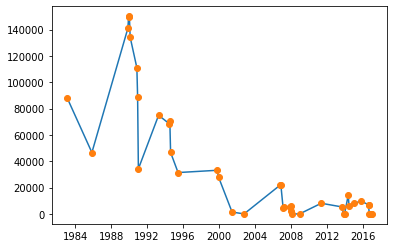

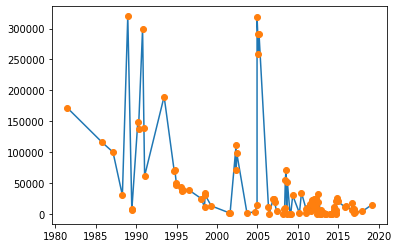

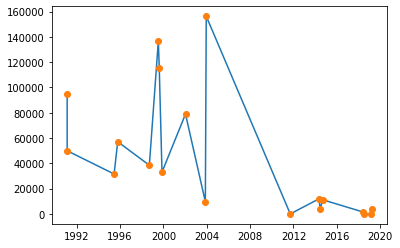

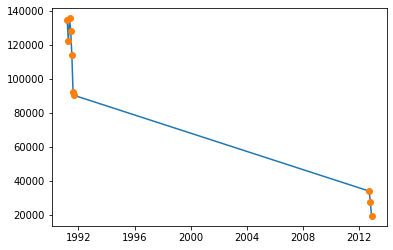

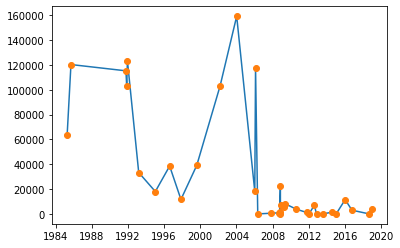

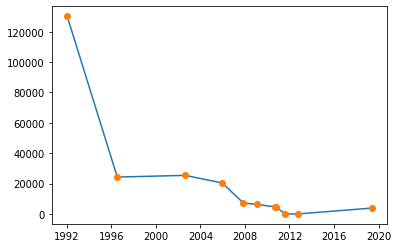

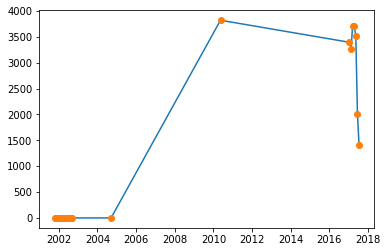

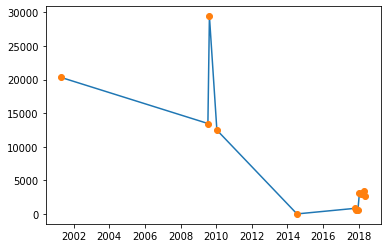

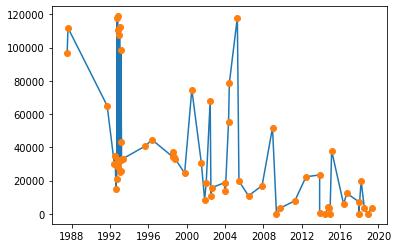

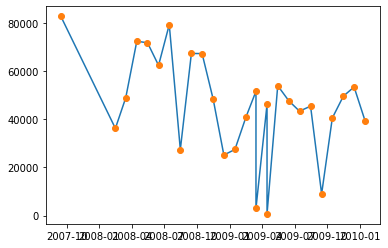

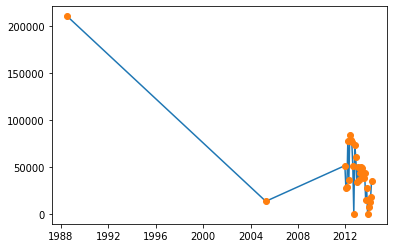

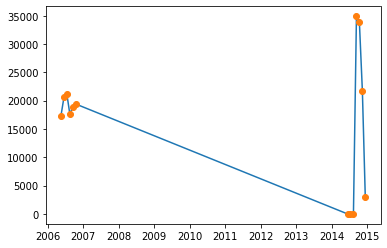

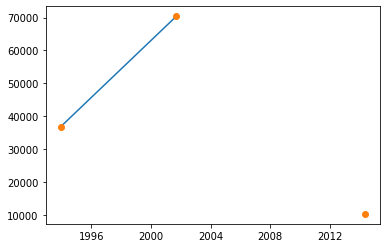

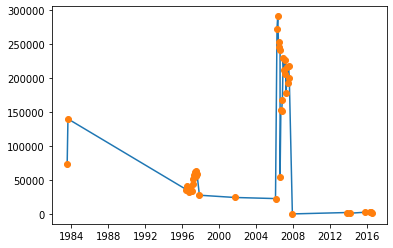

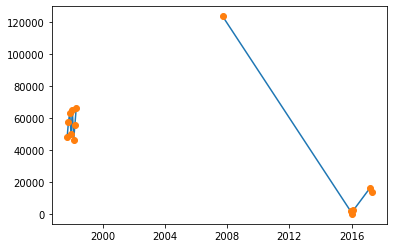

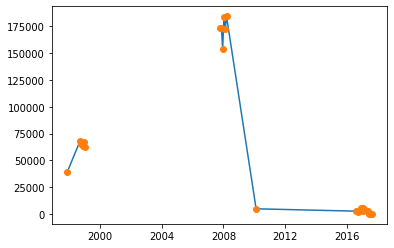

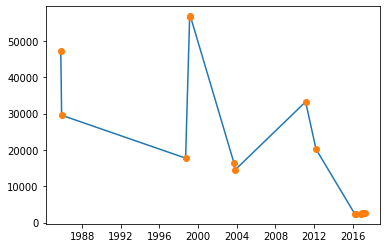

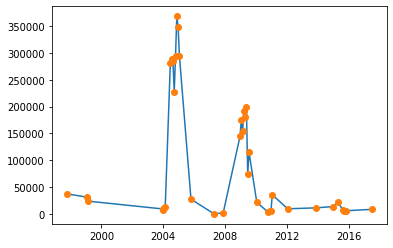

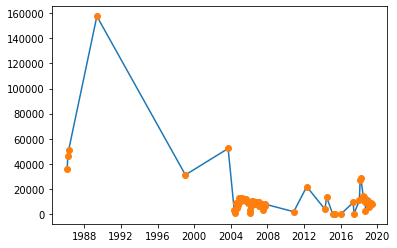

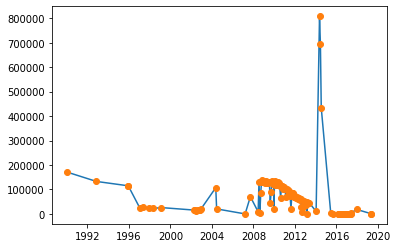

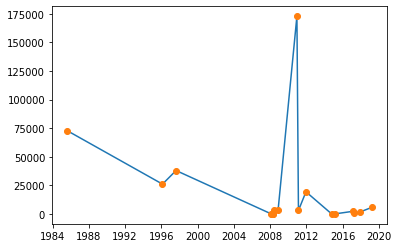

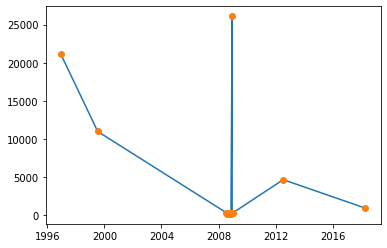

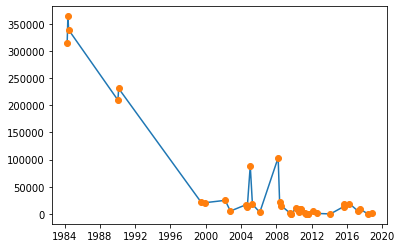

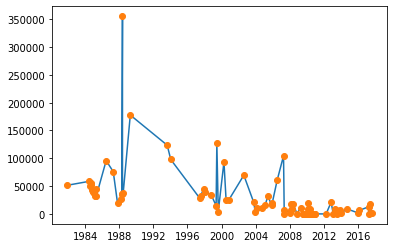

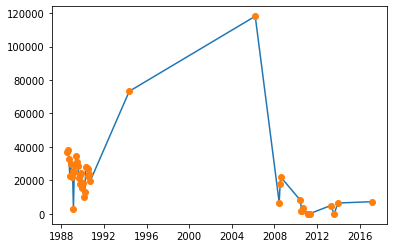

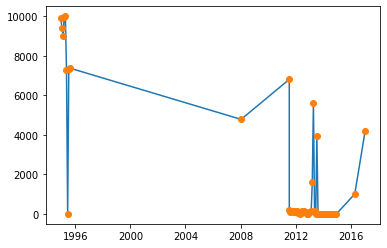

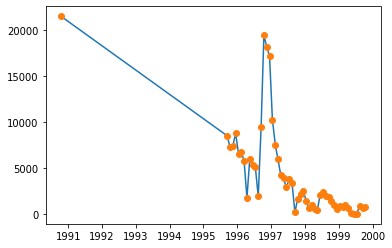

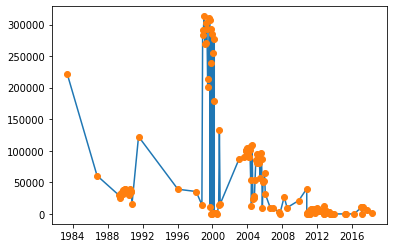

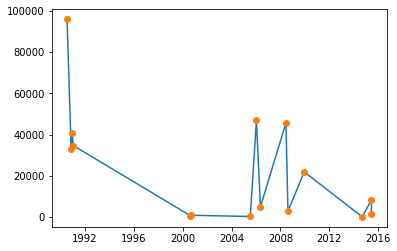

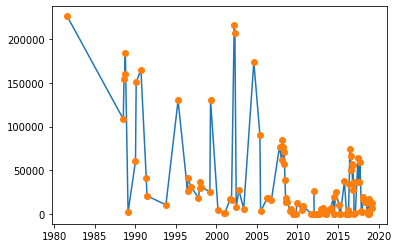

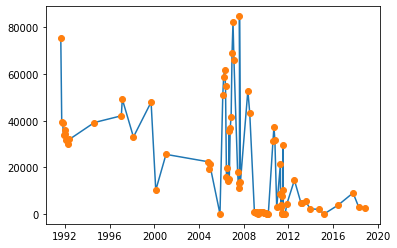

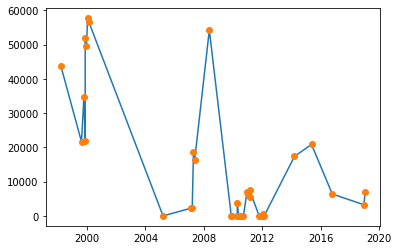

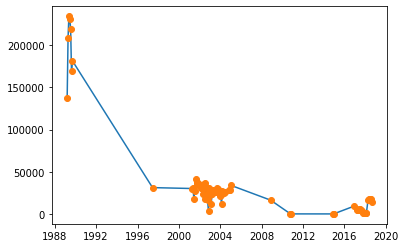

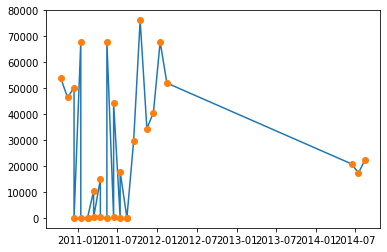

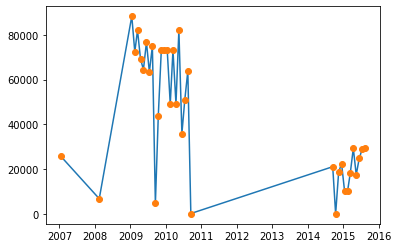

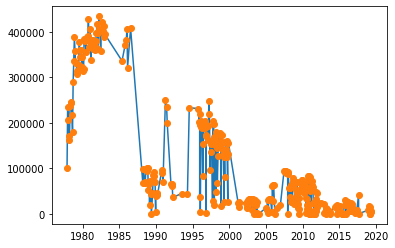

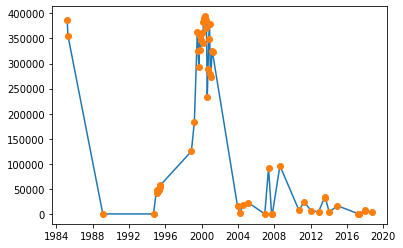

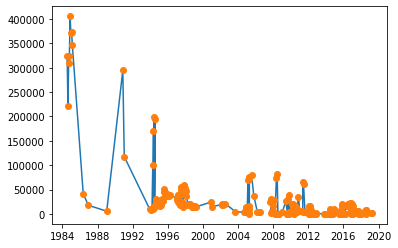

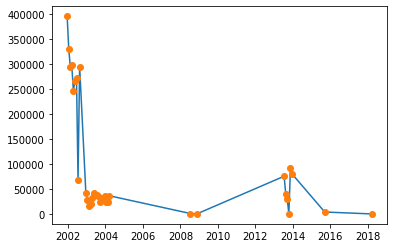

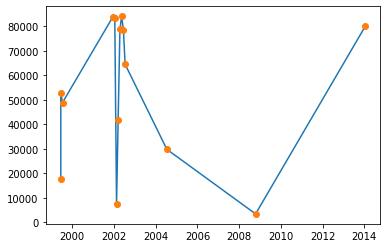

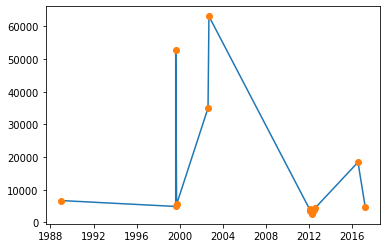

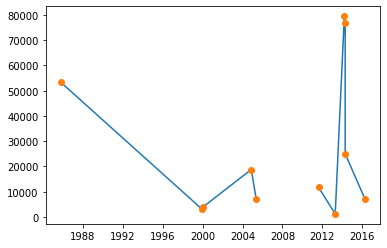

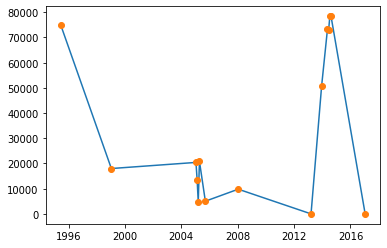

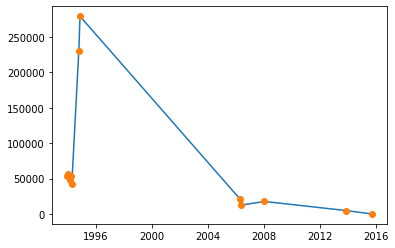

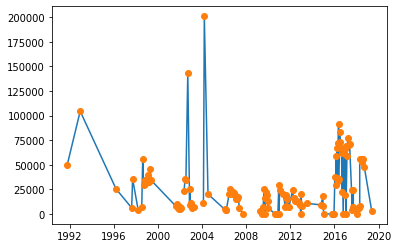

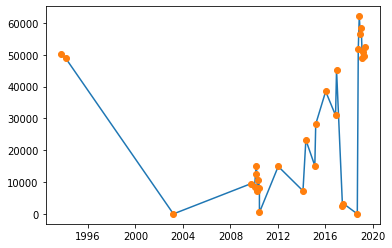

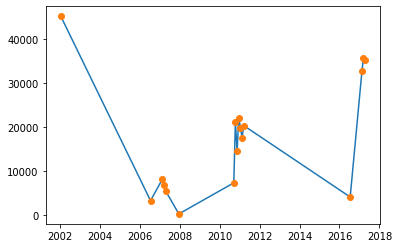

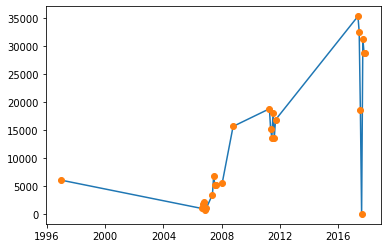

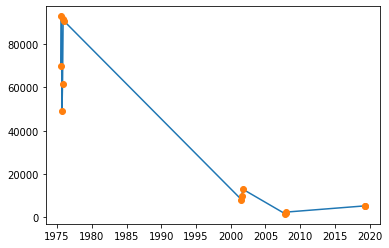

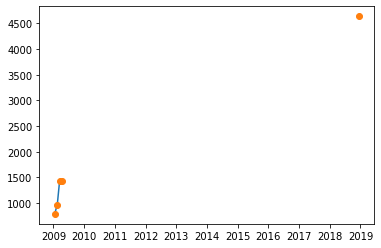

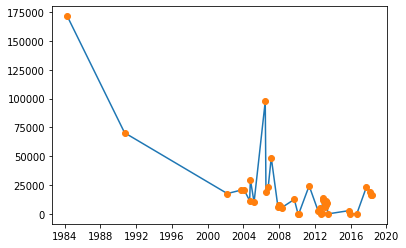

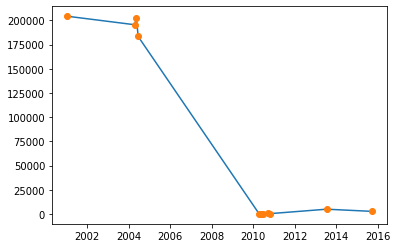

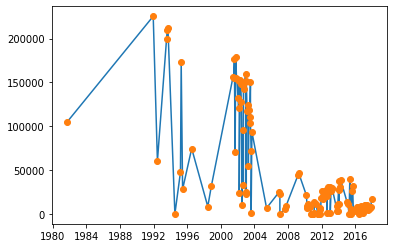

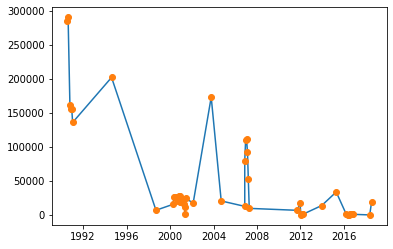

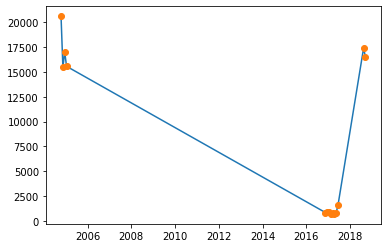

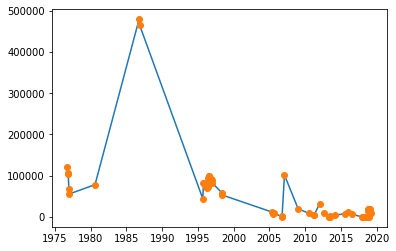

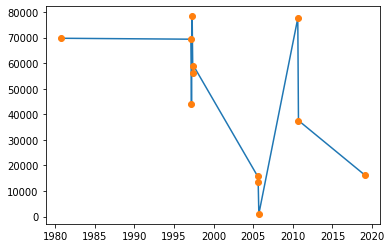

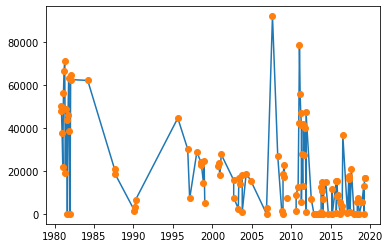

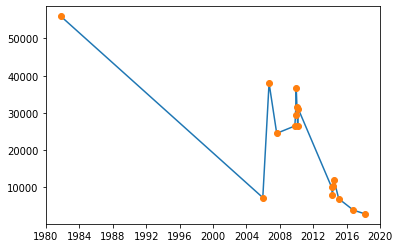

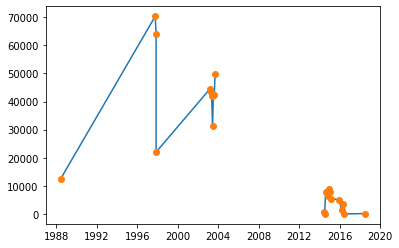

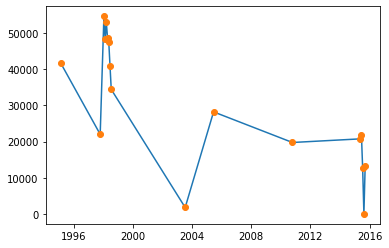

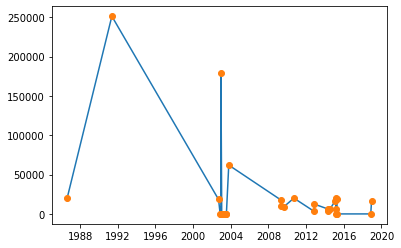

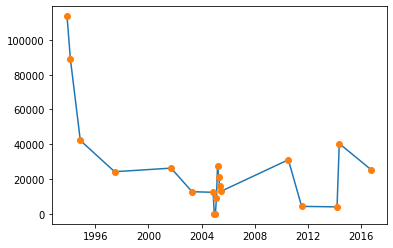

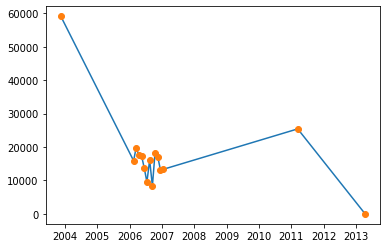

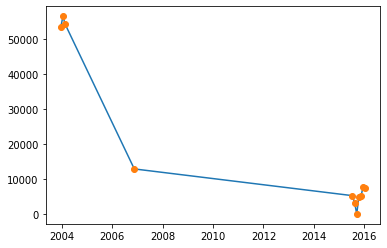

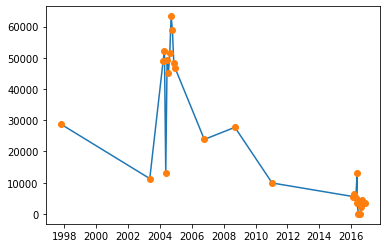

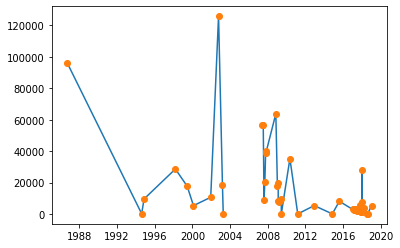

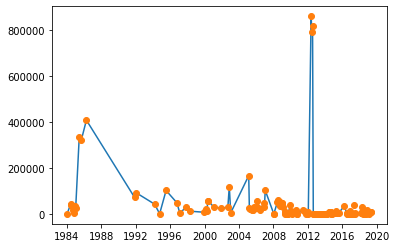

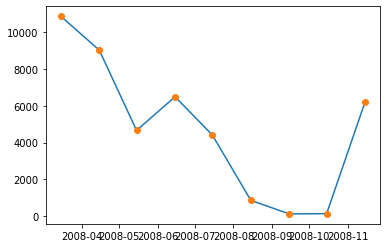

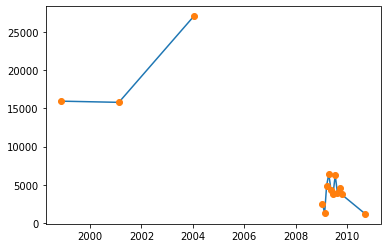

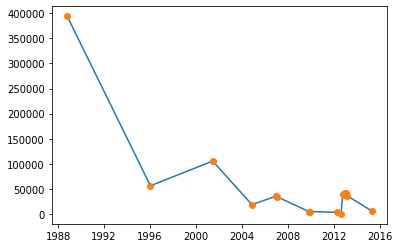

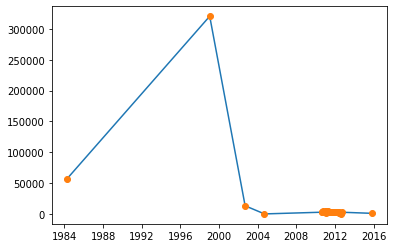

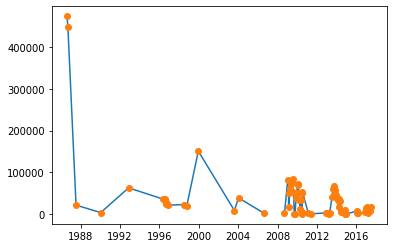

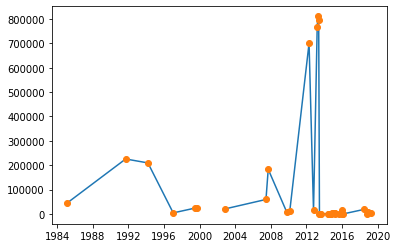

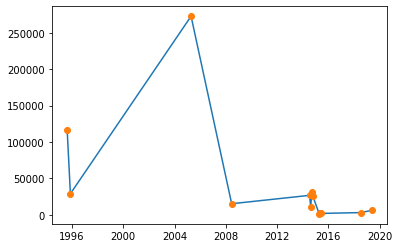

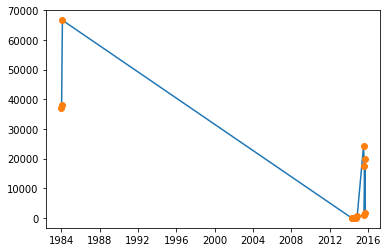

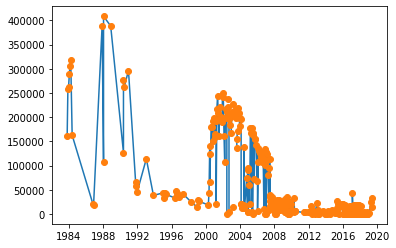

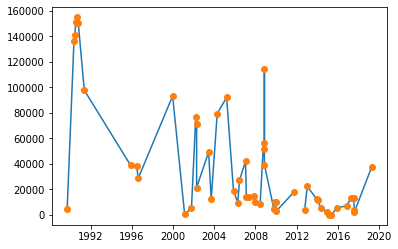

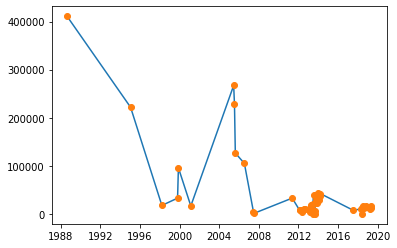

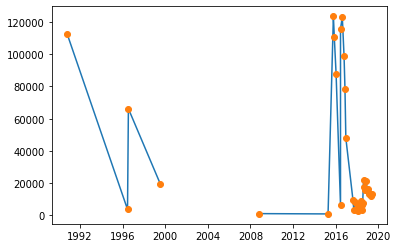

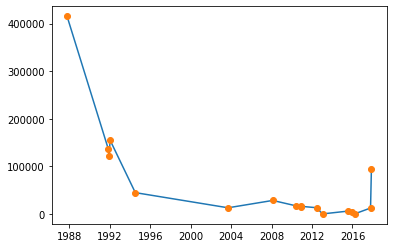

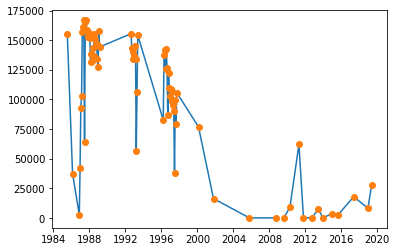

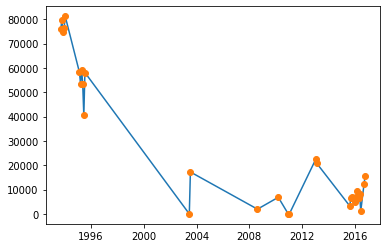

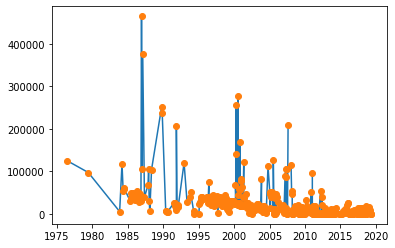

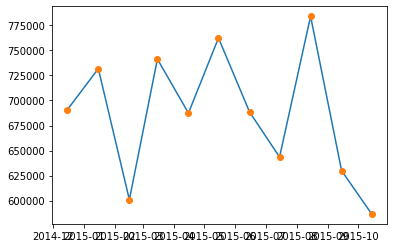

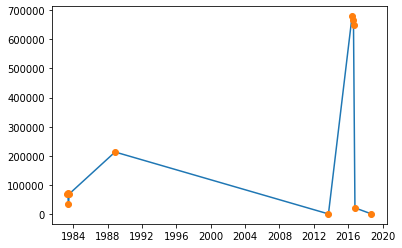

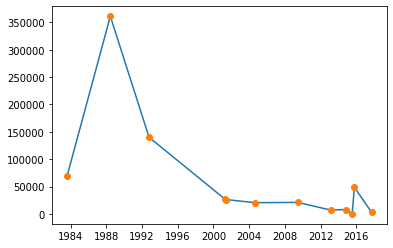

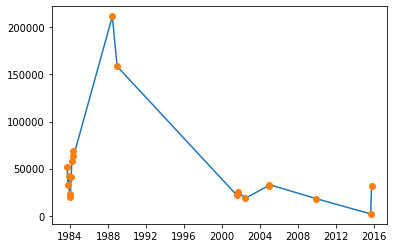

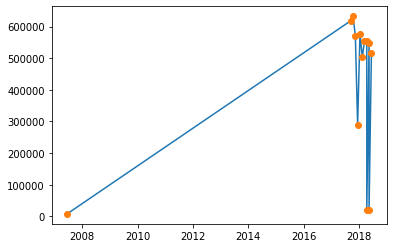

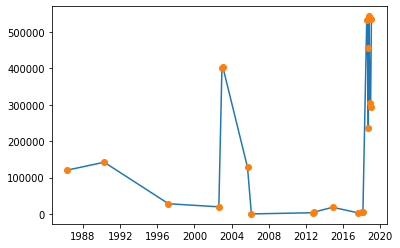

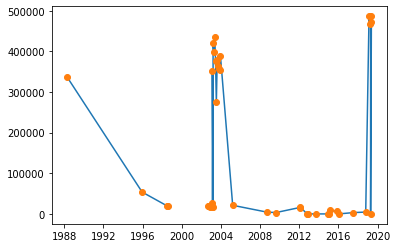

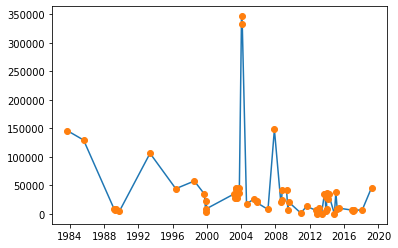

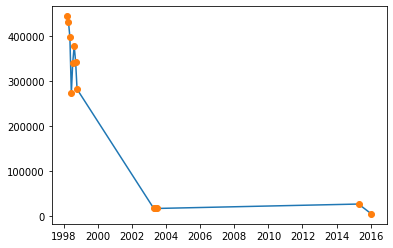

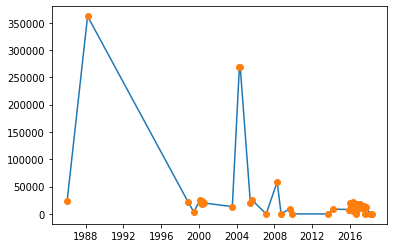

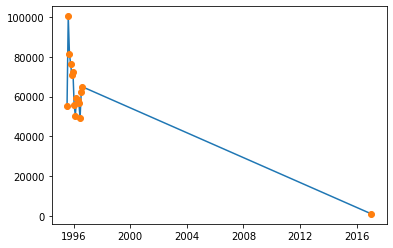

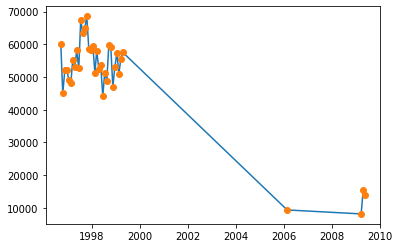

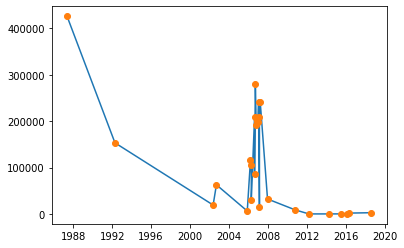

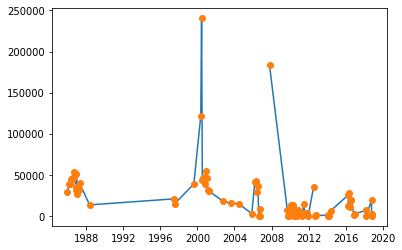

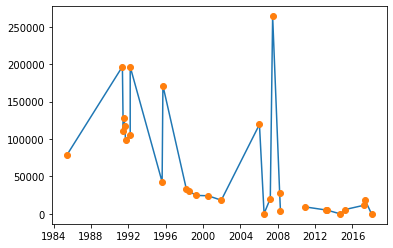

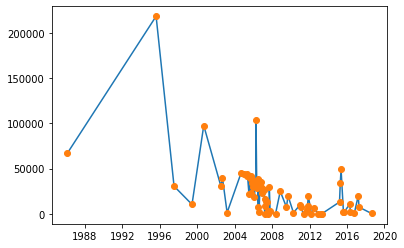

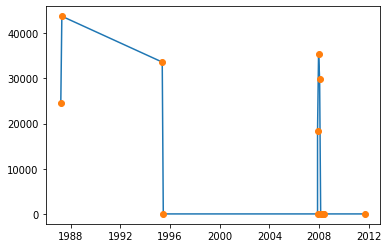

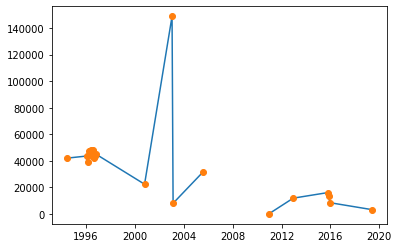

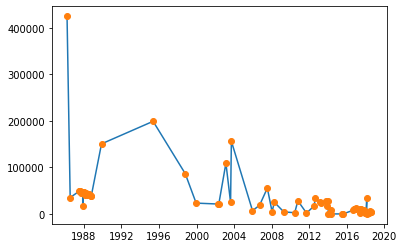

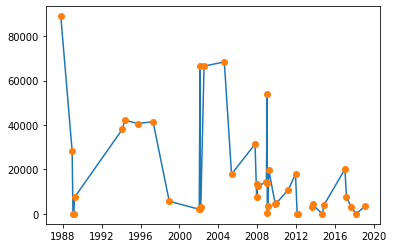

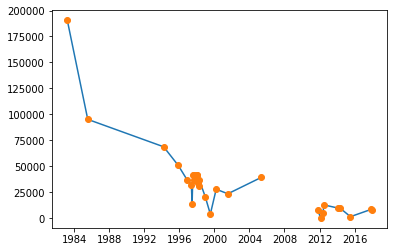

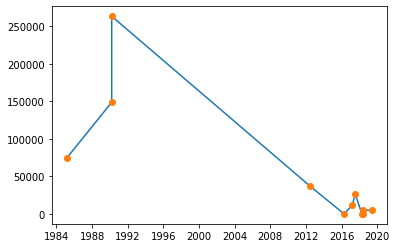

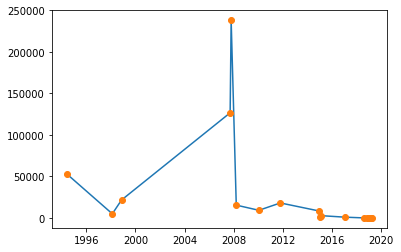

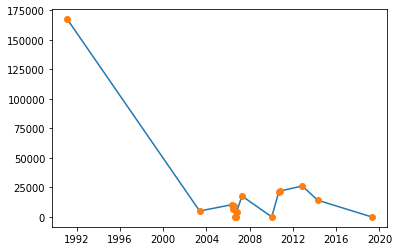

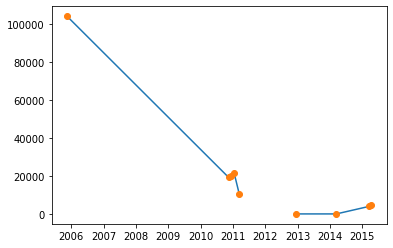

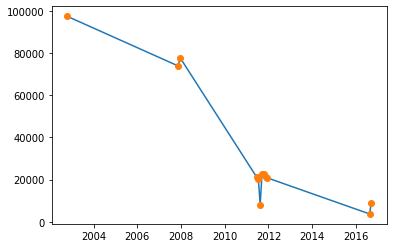

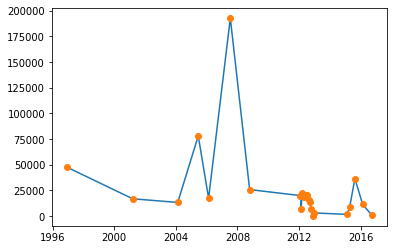

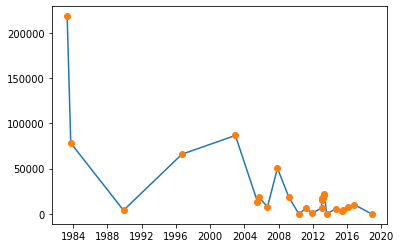

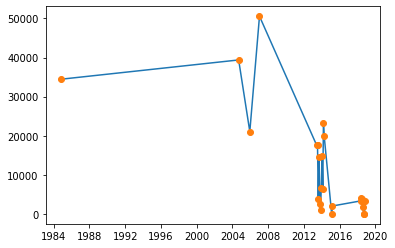

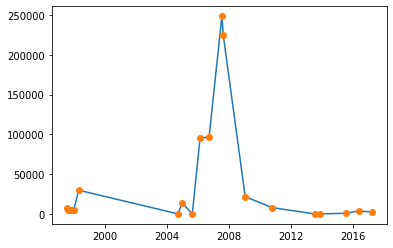

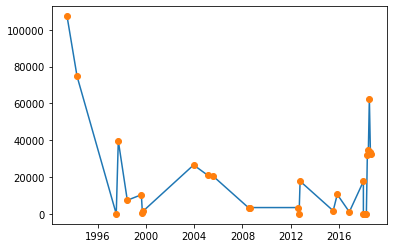

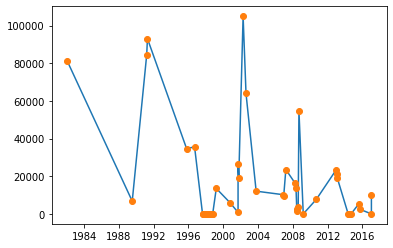

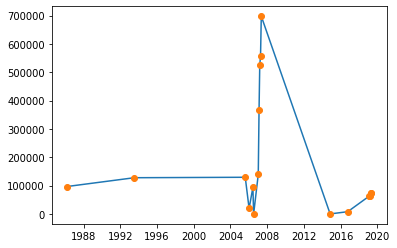

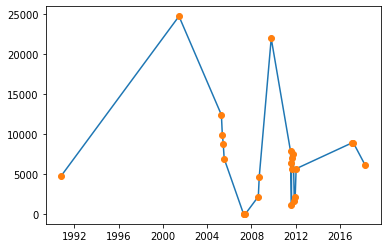

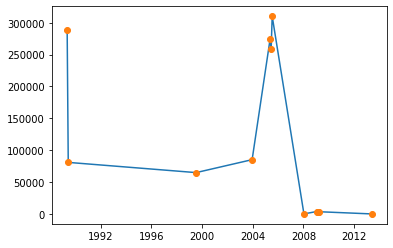

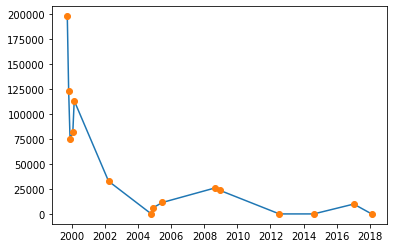

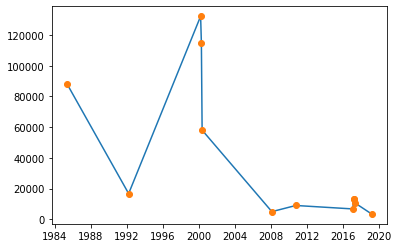

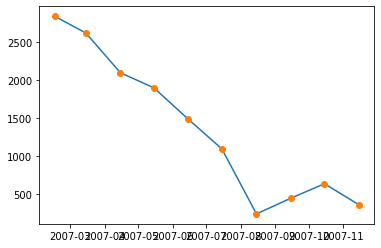

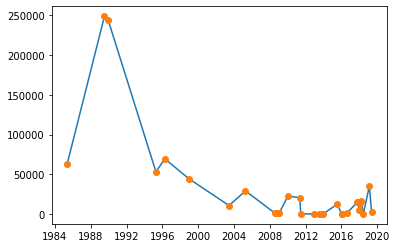

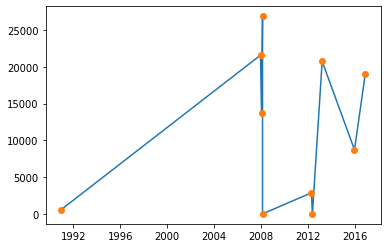

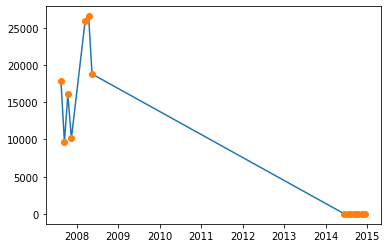

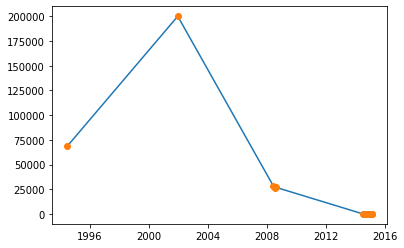

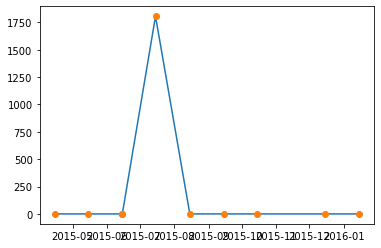

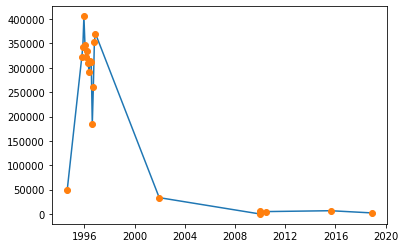

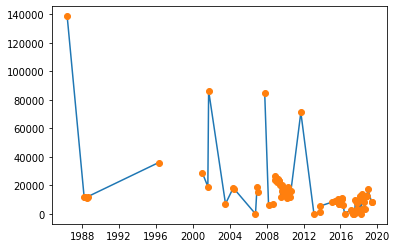

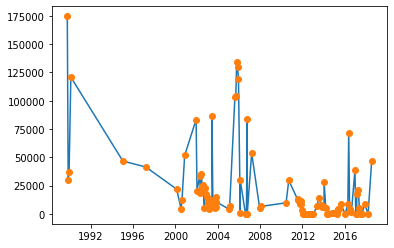

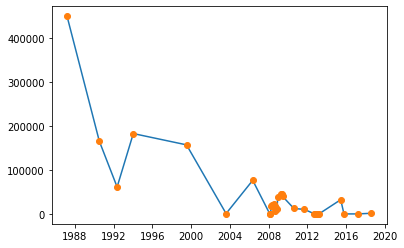

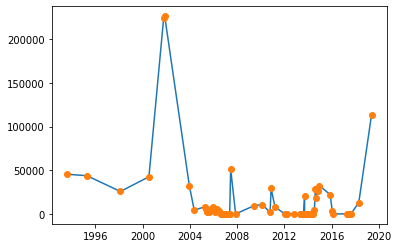

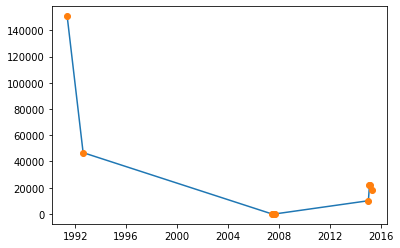

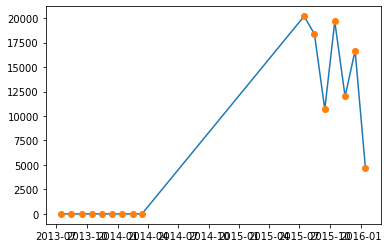

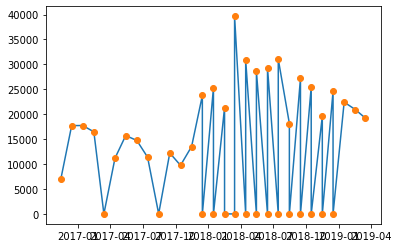

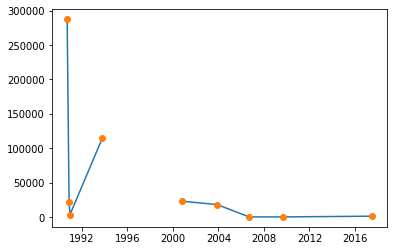

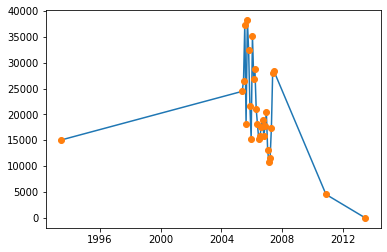

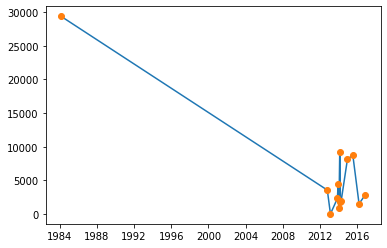

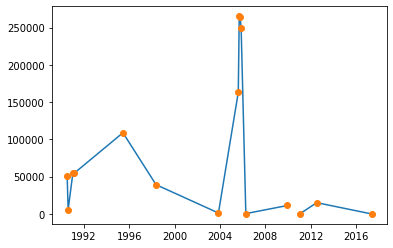

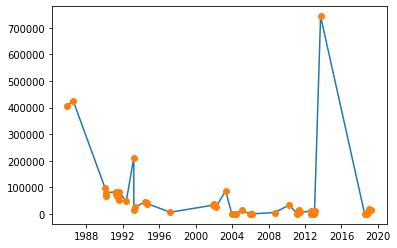

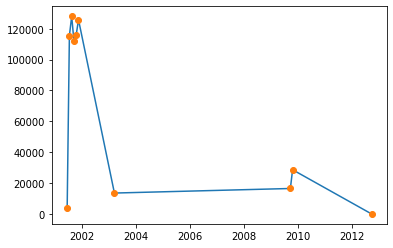

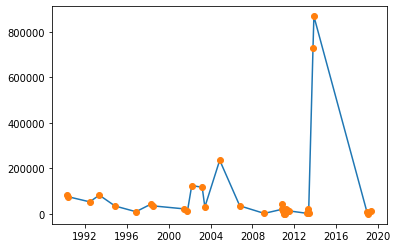

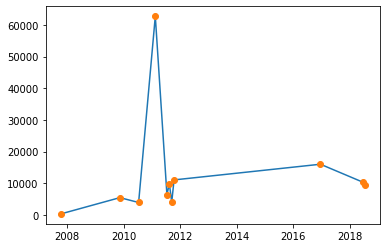

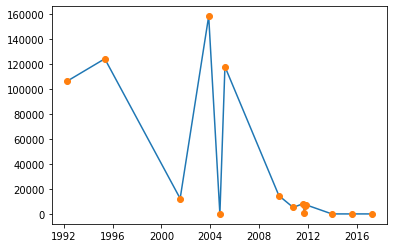

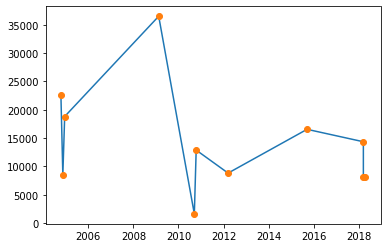

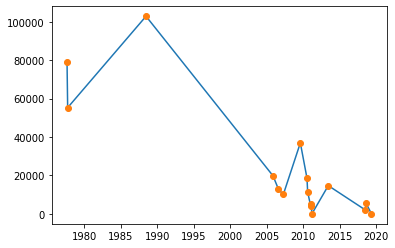

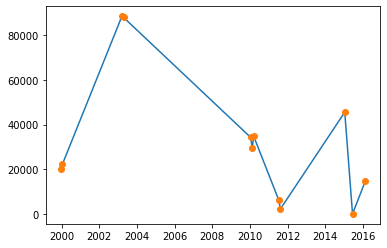

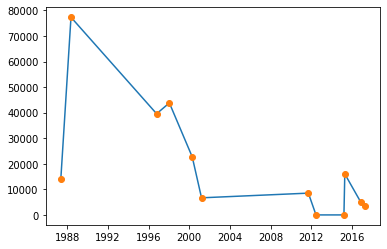

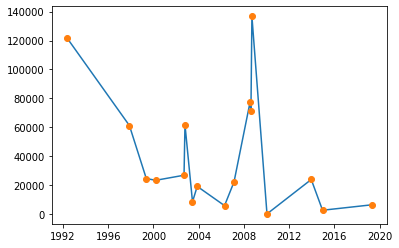

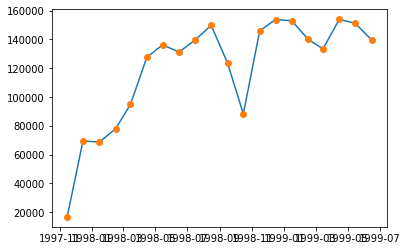

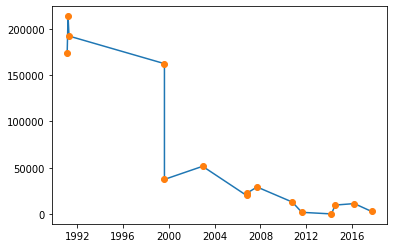

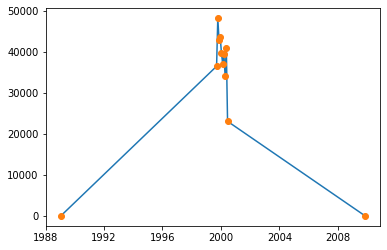

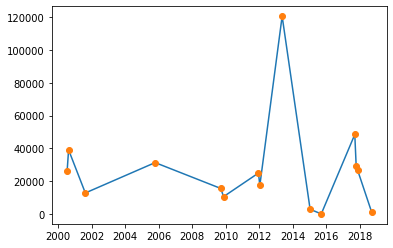

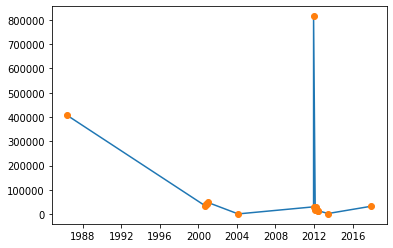

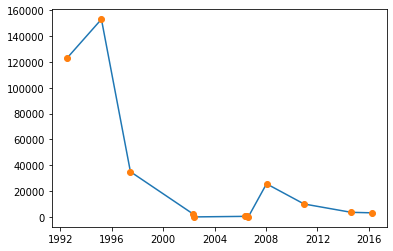

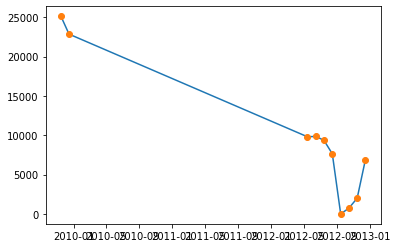

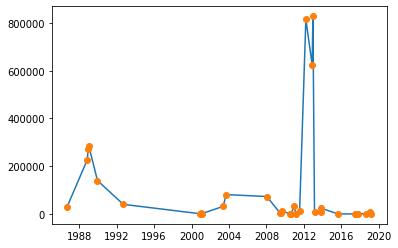

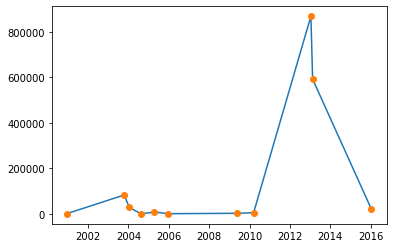

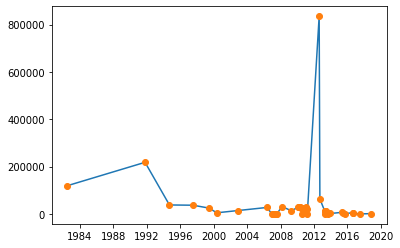

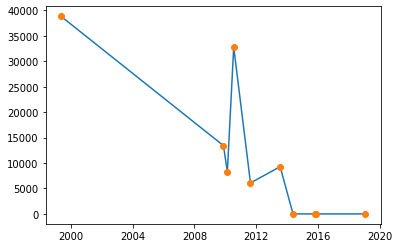

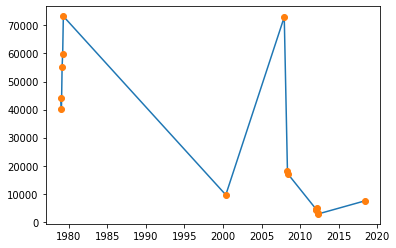

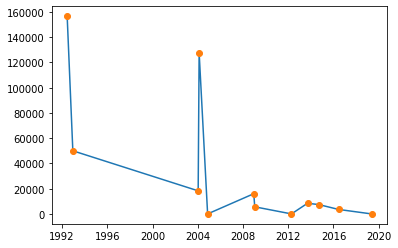

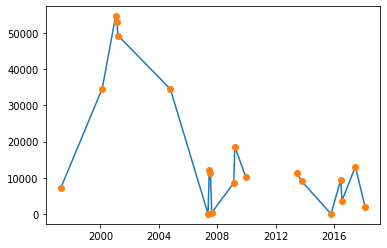

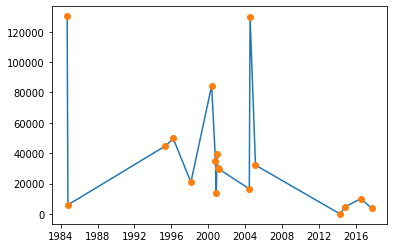

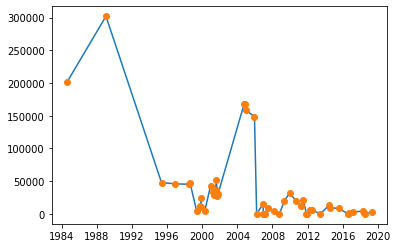

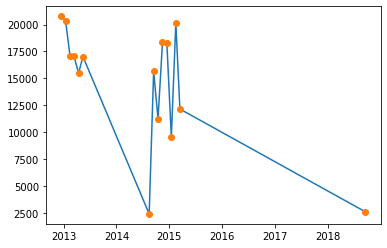

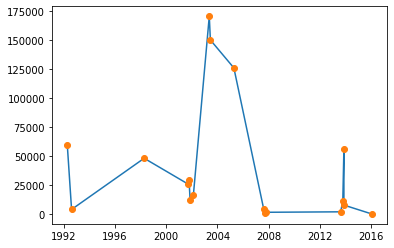

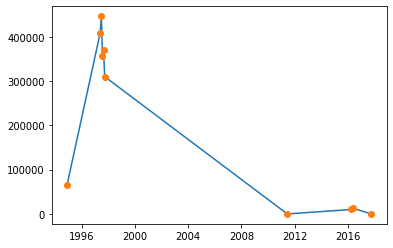

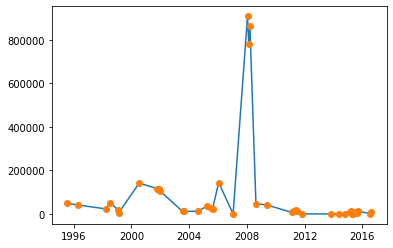

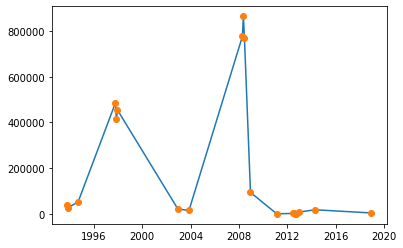

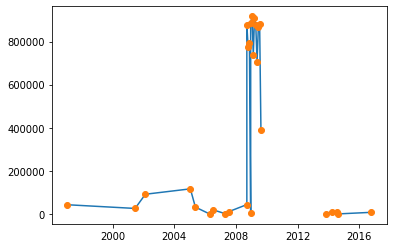

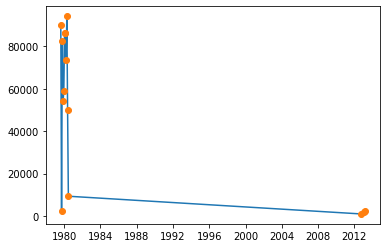

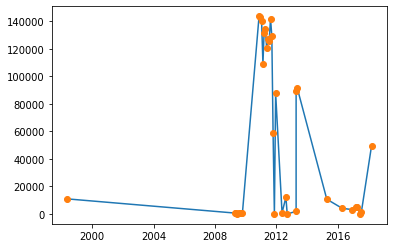

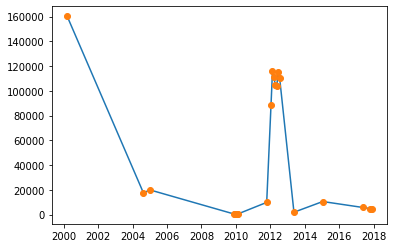

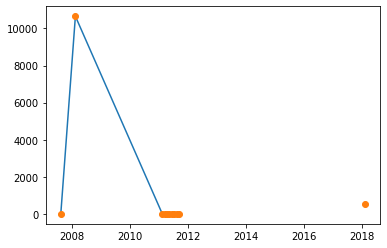

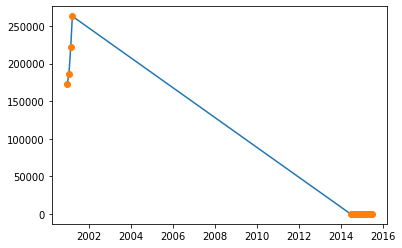

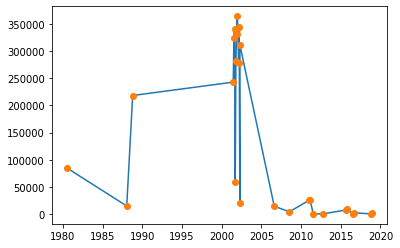

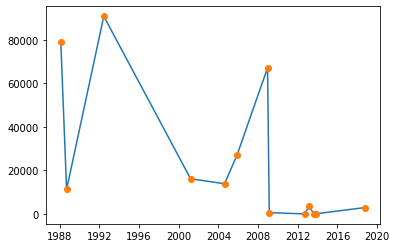

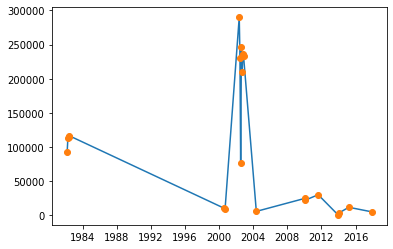

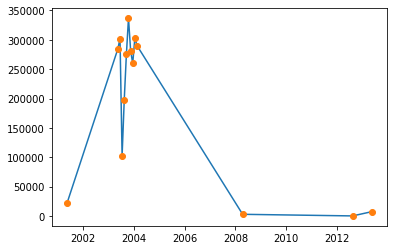

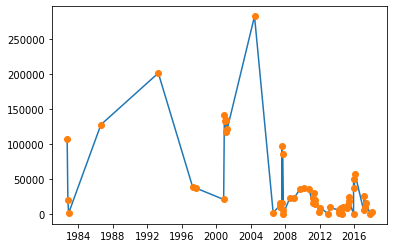

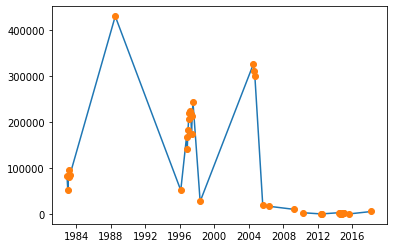

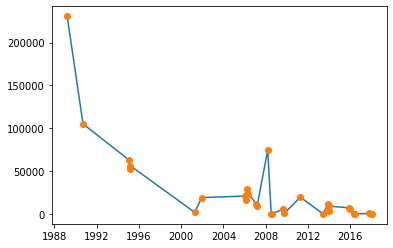

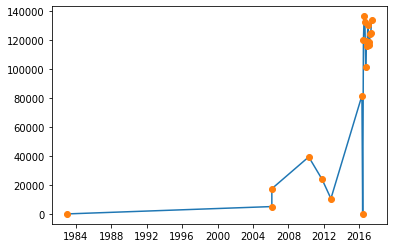

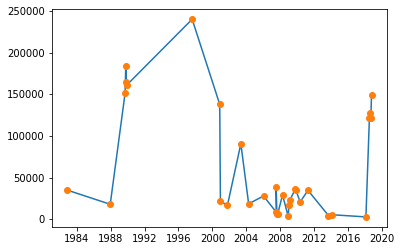

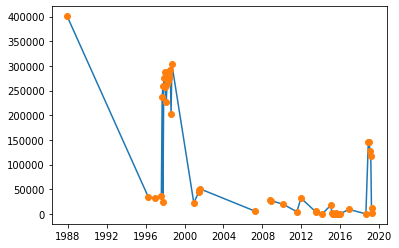

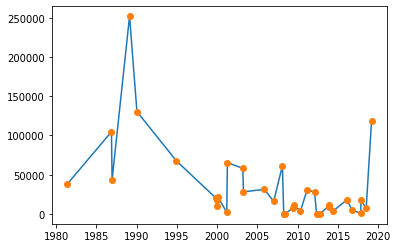

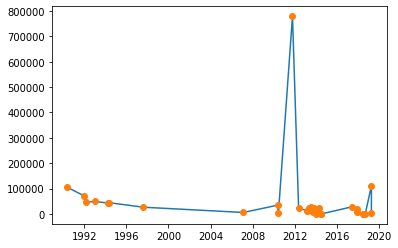

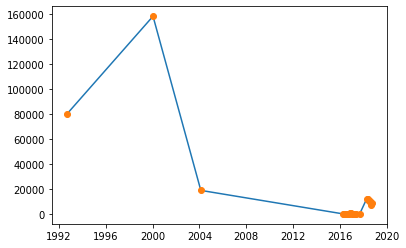

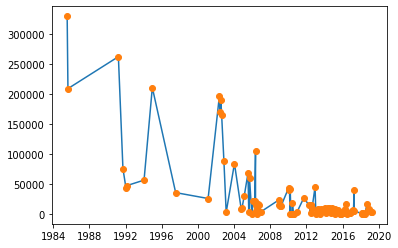

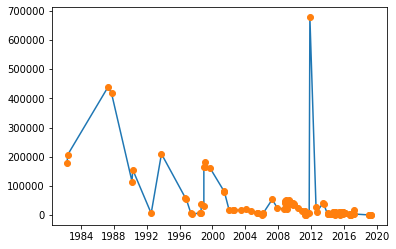

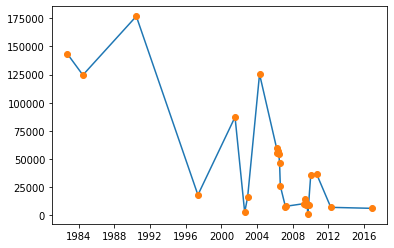

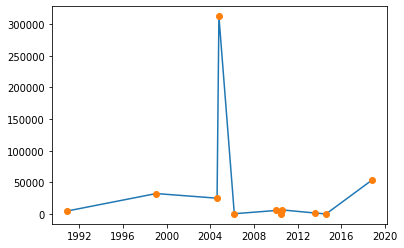

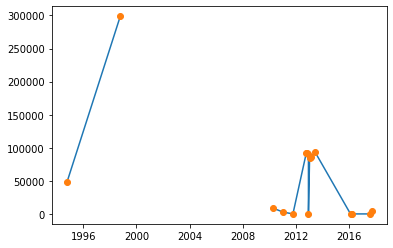

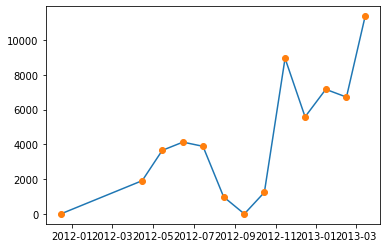

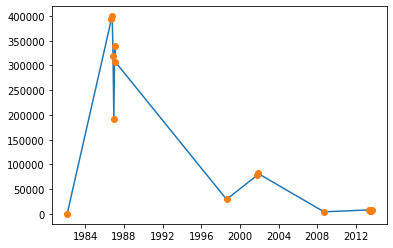

In [89]:
for k in prod_blocks.keys(): 
    if len(prod_blocks[k]) < 10: 
        continue
    plt.plot(prod_blocks[k]['date'], prod_blocks[k]['OILPRODMAS'])
    plt.plot(prod_blocks[k]['date'], prod_blocks[k]['OILPRODMAS'], 'o')
#     prod_blocks[k].plot(x='date',y='OILPRODMAS', style='.')
    plt.show()

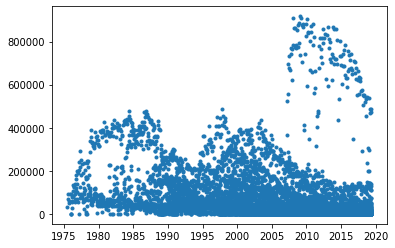

In [87]:
plt.plot(prod['date'], prod['OILPRODMAS'])

In [62]:
b = prod_blocks['04/20']

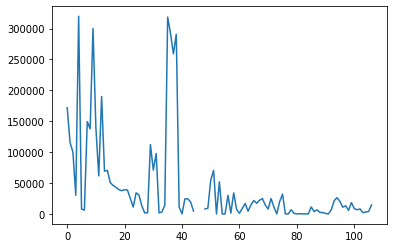

In [80]:
b['OILPRODMAS'].plot()

In [ ]:
b['target'] = 

In [168]:
data['is_oil'] = data['OILPRODMAS'].copy()
data.loc[data['is_oil'] == 0, 'is_oil'] = None

In [171]:
data.groupby('block')['is_oil']

In [129]:
data = pd.read_csv('data/df_digital.csv')

In [130]:
data['date'] = pd.to_datetime(data['date'])

In [202]:
data['WH_LONG'] = data['WH_LONG'].ffill()
data['WH_LAT'] = data['WH_LAT'].ffill()

In [131]:
data = data.sort_values(['block', 'date']).reset_index(drop=True)

In [132]:
data['oilprod'] = data['OILPRODMAS'].copy()

In [133]:
data.loc[data['oilprod'] == 0, 'oilprod'] = None

In [138]:
data['oilprod'] = data.groupby('block')['oilprod'].apply(lambda x: x.interpolate(limit_direction='both'))

In [142]:
data['target'] = data.groupby('block')['oilprod'].shift(-1).fillna(method='ffill')

In [152]:
shifts_values = [1, 2, 4, 8]
shifts = []
for s in shifts_values: 
    shift_name = f'feat_sh_{s}'
    data[shift_name] = data.groupby('block')['oilprod'].shift(s).fillna(method='bfill')
    shifts.append(shift_name)

In [153]:
features = shifts + ['oilprod']
target = 'target'

In [155]:
x

array([[646.574, 646.574, 646.574, 646.574,     nan],
       [646.574, 646.574, 646.574, 646.574,     nan],
       [646.574, 646.574, 646.574, 646.574,     nan],
       ...,
       [646.574, 646.574, 646.574, 646.574,     nan],
       [646.574, 646.574, 646.574, 646.574,     nan],
       [646.574, 646.574, 646.574, 646.574,     nan]])

True

In [420]:
list(data)

['date',
 'block',
 'OILPRODMAS',
 'OILPRODM3',
 'OILPRDDENS',
 'OILPRODMBD',
 'WATPRODMAS',
 'WATPRODVOL',
 'WATPRODMBD',
 'AGASPRODMA',
 'AGASPROMMS',
 'AGASPROKSM',
 'AGASPRODEN',
 'GAS_C1',
 'GAS_C2',
 'C2_UNSAT',
 'GAS_C3',
 'C3_UNSAT',
 'GAS_IC4',
 'GAS_NC4',
 'C4_UNSAT',
 'GAS_NEOC5',
 'GAS_IC5',
 'GAS_NC5',
 'C5_UNSAT',
 'GAS_NC5_PLUS',
 'GAS_C6PLUS',
 'GAS_O2',
 'GAS_CO2',
 'WH_LONG',
 'WH_LAT',
 'OILPRODMAS_interpolated',
 'OILPRODM3_interpolated',
 'OILPRDDENS_interpolated',
 'OILPRODMBD_interpolated',
 'WATPRODMAS_interpolated',
 'WATPRODVOL_interpolated',
 'WATPRODMBD_interpolated',
 'AGASPRODMA_interpolated',
 'AGASPROMMS_interpolated',
 'AGASPROKSM_interpolated',
 'AGASPRODEN_interpolated',
 'oilprod',
 'target',
 'feat_sh_1',
 'feat_sh_2',
 'feat_sh_4',
 'feat_sh_8',
 'is_oil',
 'prop1',
 'prop2',
 'prop3',
 'GAS_C11',
 'GAS_C21',
 'C2_UNSAT1',
 'GAS_C31',
 'C3_UNSAT1',
 'GAS_IC41',
 'GAS_NC41',
 'C4_UNSAT1',
 'GAS_NEOC51',
 'GAS_IC51',
 'GAS_NC51',
 'C5_UNSAT1',
 'GAS_

In [422]:
data['gasprod'] = data['AGASPRODMA'].copy()

In [423]:
data.loc[data['gasprod'] == 0, 'gasprod'] = None

In [424]:
data['gasprod'] = data.groupby('block')['gasprod'].apply(lambda x: x.interpolate(limit_direction='both'))
data['gasprod'] = data.groupby('block')['gasprod'].shift(-1).fillna(method='ffill')

In [425]:
data['gas_oil'] = data['gasprod'] / data['oilprod']

In [427]:
targets = ['target', 'gasprod', 'gas_oil']

# predict dummy

In [176]:
model_preds = {}
for i, g in data.groupby('block'): 
    if any(g[features].isnull().sum() > 0): 
        print(f'skippend {i}')
        continue
    x = g[features].values
    y = g[target].values
    lr = LinearRegression().fit(x, y)
    pred = lr.predict(g.loc[(~data['is_oil'].isnull()), features])
    model_preds[i] = (g.loc[(~data['is_oil'].isnull()), target].values, pred)
    print(f'done {i}')

done 13/23
done 14/20b
done 14/26a
done 14/26b
done 14/29
done 14/29a
done 15/16
skippend 15/17b
done 15/18a
done 15/21
done 15/21a
done 15/21b
done 15/22
done 15/24b
done 15/27
done 15/28b
done 20/02
skippend 20/04
skippend 20/08
skippend 21/02
done 21/12
skippend 21/12a
done 21/15a
done 21/18
done 21/19
done 21/20a
done 21/20b
done 21/23b
done 21/24
skippend 21/24a
done 21/25
skippend 21/25a
skippend 21/25b
done 21/29a
done 21/30
skippend 21/30b
skippend 21/30d
skippend 21/30f
done 22/06a
skippend 22/07
done 22/11
skippend 22/11a
done 22/12a
skippend 22/12c
skippend 22/13a
done 22/14b
done 22/21
done 22/22b
skippend 22/24
done 22/24a
done 22/24b
done 22/24d
done 22/26a
done 22/29
done 22/29c
done 22/30a
done 22/30b
done 23/16b
done 23/22a
done 23/27
done 23/27a
done 29/03a
done 29/03c
skippend 29/05
done 29/05b
done 29/07
skippend 29/07a
skippend 29/08a
skippend 29/09a
skippend 29/09b
skippend 29/10
done 30/06
done 30/07a
done 30/14
done 30/16
done 30/17a
done 30/19a


In [196]:
model_preds['13/23']

(array([387971.7468 , 349953.90892,  12464.56425,  26478.153  ]),
 array([370775.56418248, 394746.63269282, -21577.79977678,  33661.54147017]))

In [ ]:
tot_res = 

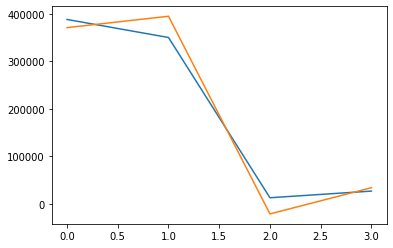

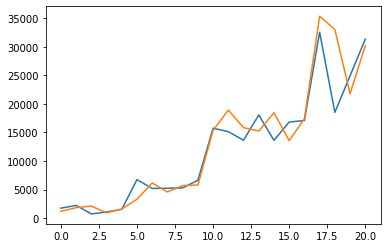

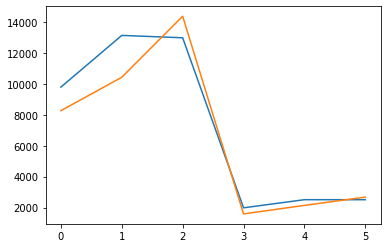

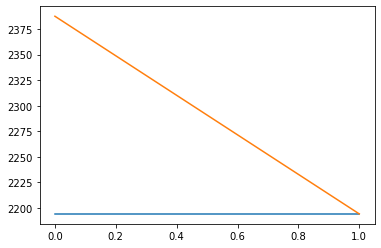

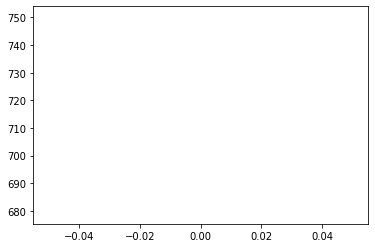

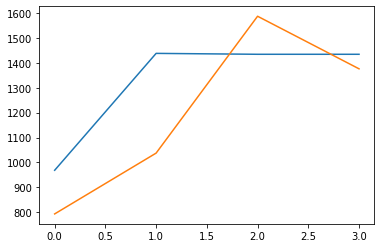

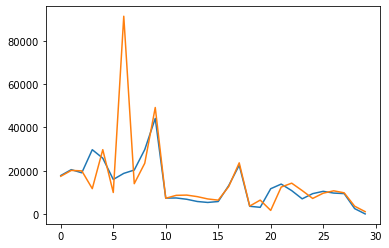

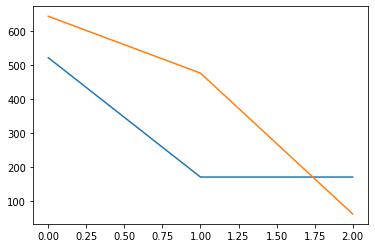

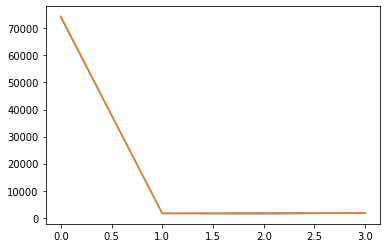

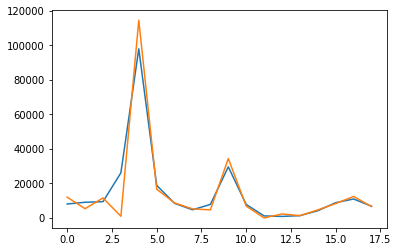

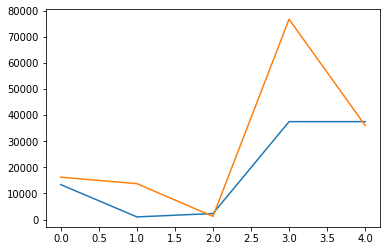

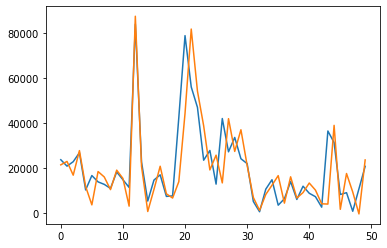

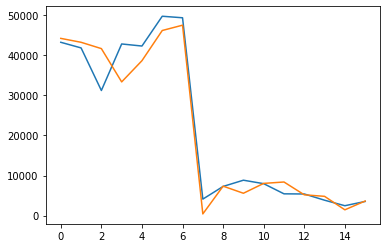

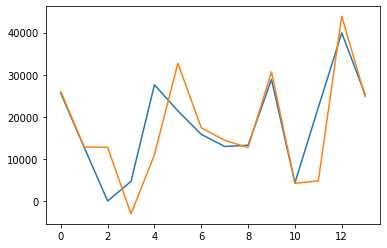

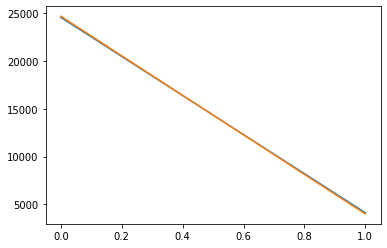

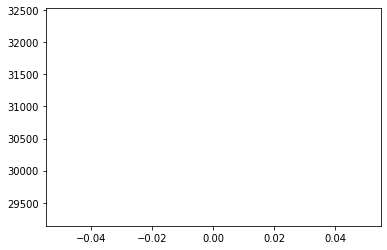

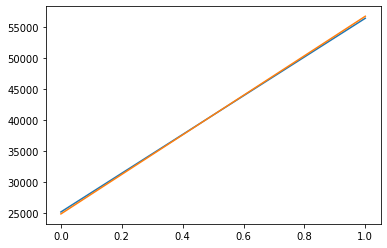

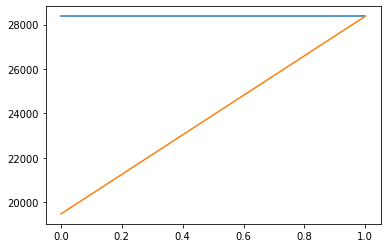

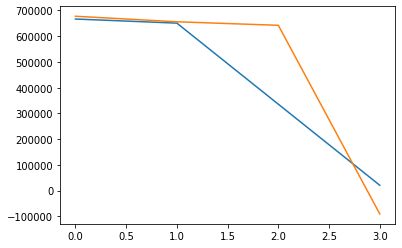

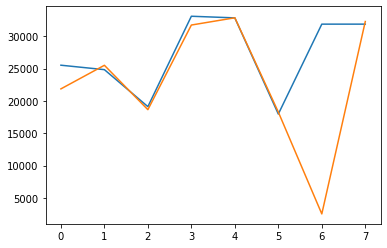

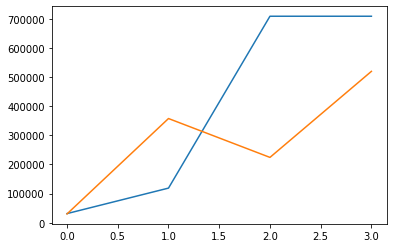

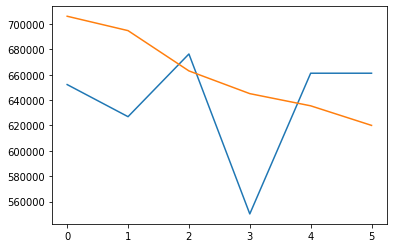

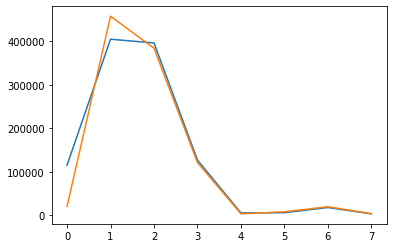

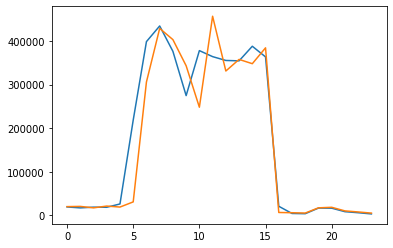

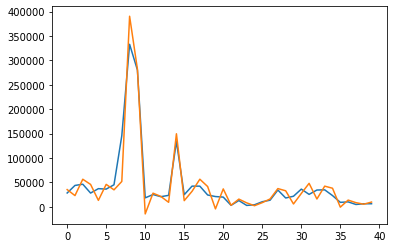

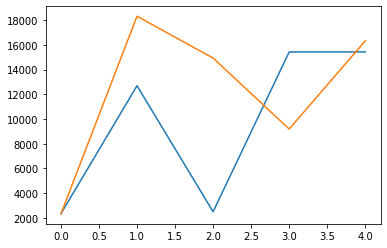

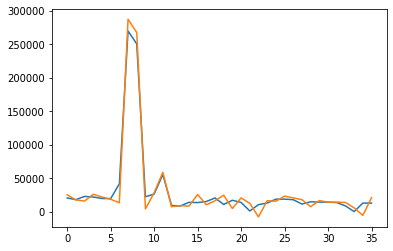

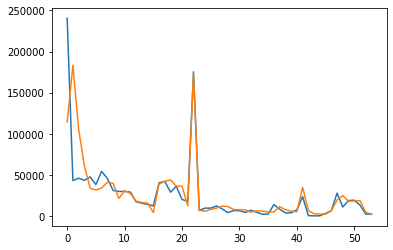

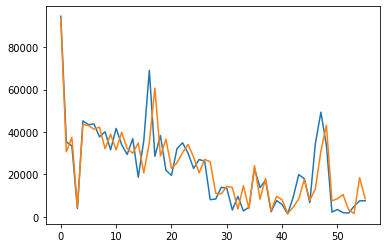

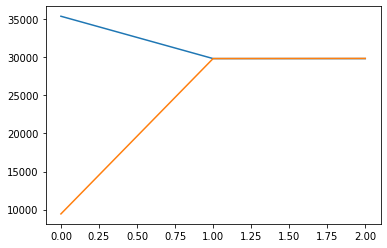

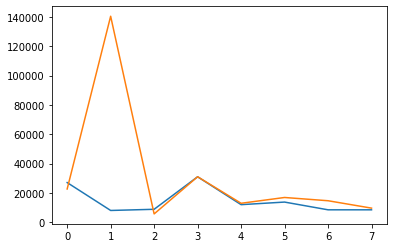

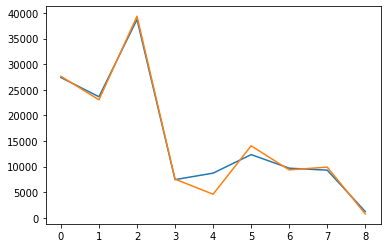

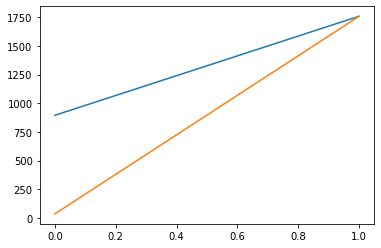

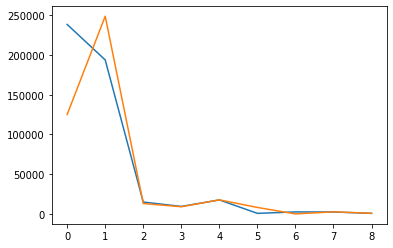

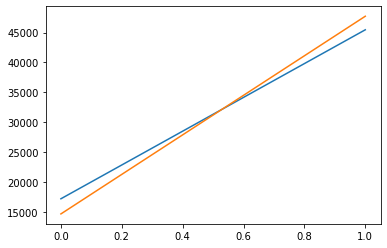

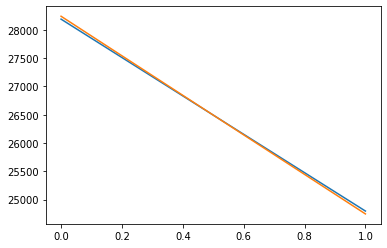

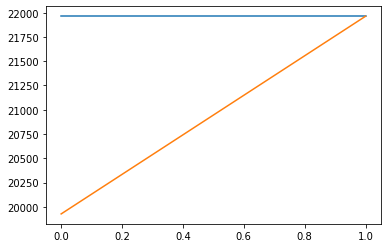

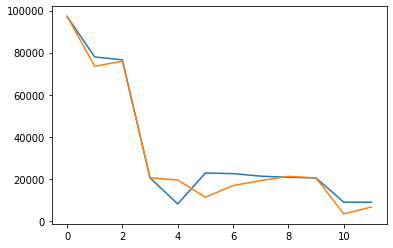

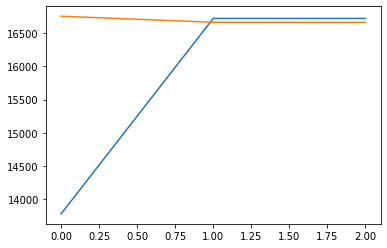

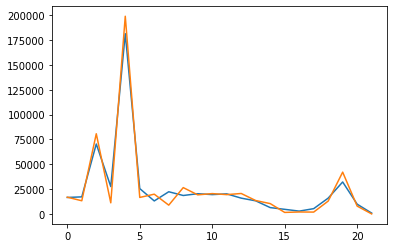

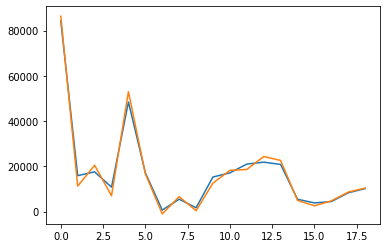

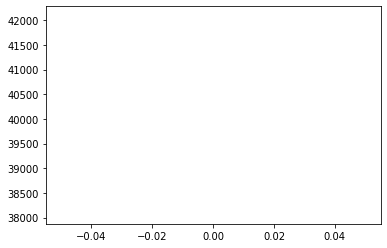

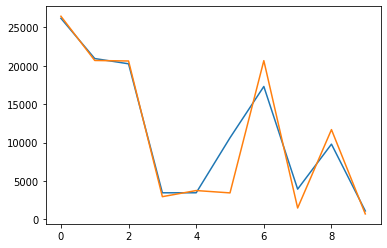

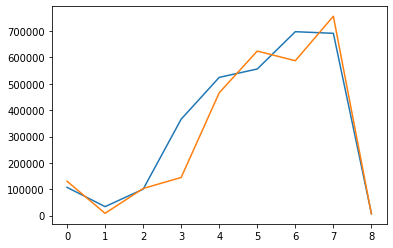

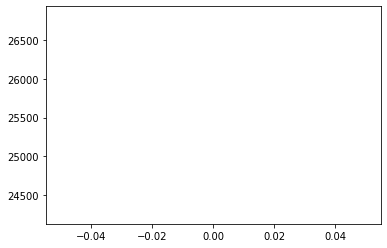

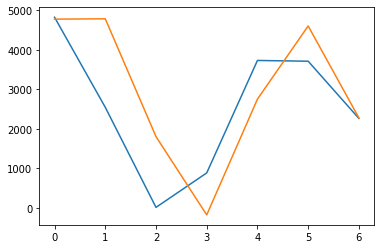

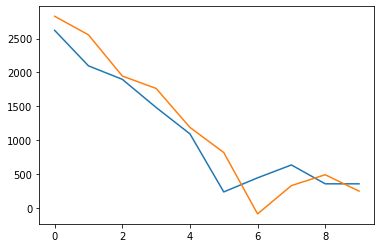

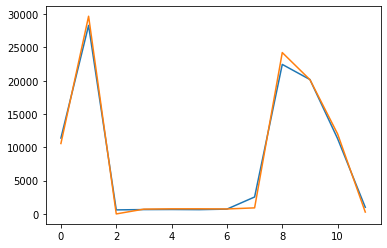

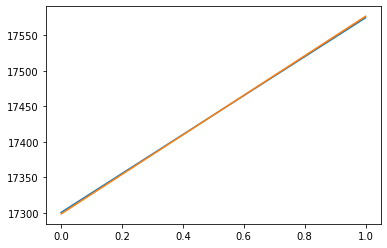

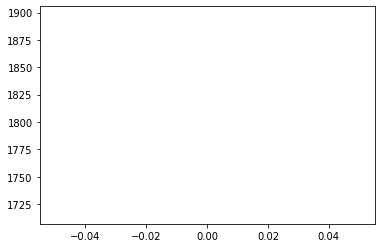

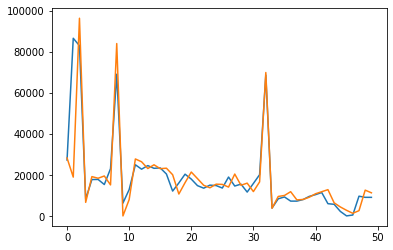

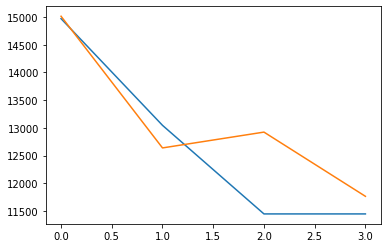

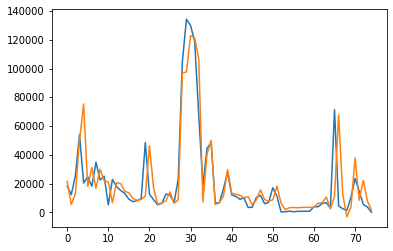

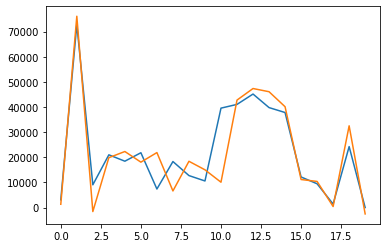

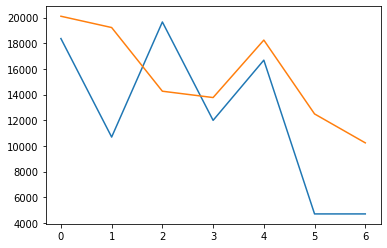

In [177]:
for k in model_preds.keys(): 
    plt.plot(model_preds[k][0])
    plt.plot(model_preds[k][1])
    plt.show()

# predict prop

In [178]:
features

['feat_sh_1', 'feat_sh_2', 'feat_sh_4', 'feat_sh_8', 'oilprod']

In [319]:
features = ['feat_sh_2', 'feat_sh_4', 'feat_sh_8', 'feat_sh_1']

In [297]:
target

'target'

In [299]:
prop_feats = ['GAS_C1', 'GAS_C2', 'C2_UNSAT', 'GAS_C3', 'C3_UNSAT', 'GAS_IC4', 'GAS_NC4', 'C4_UNSAT',
 'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5', 'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2',
             ]

In [300]:
prop_feats1 = [x + '1' for x in prop_feats]
prop_feats2 = [x + '2' for x in prop_feats]
prop_feats3 = [x + '3' for x in prop_feats]

In [301]:
for pf in [prop_feats1, prop_feats2, prop_feats3]: 
    for f in pf: 
        data[f] = None

In [302]:
data['WH_LAT'].isnull().sum()

0

In [303]:
len(data['WH_LAT'])

16401

In [304]:
blocks = {}
for i, g in data.groupby('block'): 
    blocks[i] = g

In [305]:
blocks_og = {}
for i, g in data.groupby('block'): 
    if len(g['GAS_C1'].unique()) < 2: 
        continue
    blocks_og[i] = g

In [499]:
with open('gas_prop.pkl', 'wb') as f: 
    pickle.dump(blocks_og, f)

In [320]:
for k in blocks.keys(): 
    lat, long = blocks[k]['WH_LAT'].iloc[0], blocks[k]['WH_LONG'].iloc[0]
    print(f'{lat}, {long}')
    dists = []
    dists_val = []
    for og in blocks_og.keys(): 
        dists.append(og)
        dists_val.append((
            (blocks_og[og]['WH_LAT'].iloc[0] -  lat) ** 2 + 
            (blocks_og[og]['WH_LONG'].iloc[0] -  long) ** 2
        ) ** 0.5)
    dists = [x for _,x in sorted(zip(dists_val,dists))]
    best_keys = dists[:3]
    print(best_keys)
    data.loc[data['block'] == k, prop_feats1] = blocks_og[best_keys[0]].loc[:, prop_feats].values
    data.loc[data['block'] == k, prop_feats2] = blocks_og[best_keys[1]].loc[:, prop_feats].values
    data.loc[data['block'] == k, prop_feats3] = blocks_og[best_keys[2]].loc[:, prop_feats].values
    

58.17926198, -1.4607590730000002
['14/29a', '15/18a', '21/20b']
58.36753631, -0.081898178
['14/29a', '15/18a', '21/20b']
58.36753631, -0.081898178
['14/29a', '15/18a', '21/20b']
58.03685295, -0.901796128
['14/29a', '15/18a', '21/20b']
58.06368812, -0.820298306
['14/29a', '15/18a', '21/20b']
58.000607495, -0.292205909
['14/29a', '15/18a', '21/20b']
58.37220532, 0.096828581
['15/18a', '14/29a', '21/20b']
58.39024638, 0.36946337700000004
['15/18a', '14/29a', '22/11a']
58.41983247, 0.48722646700000005
['15/18a', '14/29a', '22/11a']
58.18108723, 0.097920606
['14/29a', '15/18a', '21/20b']
58.29780921, 0.13788738
['15/18a', '14/29a', '21/20b']
58.31440191, 0.034171521
['14/29a', '15/18a', '21/20b']
58.26389748, 0.22842027899999998
['15/18a', '14/29a', '21/20b']
58.3126221, 0.730806595
['15/18a', '22/11a', '22/11']
58.049202, 0.329932535
['15/18a', '14/29a', '21/20b']
58.06969864, 0.450990457
['15/18a', '14/29a', '21/20b']
57.89987332, -0.6388918579999999
['14/29a', '15/18a', '21/20b']
57.8998

In [321]:
data[prop_feats1] = data[prop_feats1].fillna(0)
data[prop_feats2] = data[prop_feats2].fillna(0)
data[prop_feats3] = data[prop_feats3].fillna(0)

In [389]:
from sklearn.preprocessing import StandardScaler

In [415]:
model_preds = {}
models = {}
for i, g in data.groupby('block'): 
    if any(g[features + ['oilprod']].isnull().sum() > 0): 
        print(f'skippend {i}')
        continue
    x = g.loc[(~data['is_oil'].isnull()), features + prop_feats1 + prop_feats2 + prop_feats3].values
    y = g.loc[(~data['is_oil'].isnull()), target].values
    scaler = StandardScaler()
    lr = LinearRegression(normalize=True).fit(scaler.fit_transform(x), y)
    models[i] = lr
    pred = lr.predict(scaler.transform(g.loc[(~data['is_oil'].isnull()), features + prop_feats1 + prop_feats2 + prop_feats3]))
    model_preds[i] = (
        g.loc[(~data['is_oil'].isnull()), target].values, 
        pred, 
        g.loc[(~data['is_oil'].isnull()), 'date'].values,
    )
    print(f'done {i}')

done 13/23
done 14/20b
done 14/26a
done 14/26b
done 14/29
done 14/29a
done 15/16
skippend 15/17b
done 15/18a
done 15/21
done 15/21a
done 15/21b
done 15/22
done 15/24b
done 15/27
done 15/28b
done 20/02
skippend 20/04
skippend 20/08
skippend 21/02
done 21/12
skippend 21/12a
done 21/15a
done 21/18
done 21/19
done 21/20a
done 21/20b
done 21/23b
done 21/24
skippend 21/24a
done 21/25
skippend 21/25a
skippend 21/25b
done 21/29a
done 21/30
skippend 21/30b
skippend 21/30d
skippend 21/30f
done 22/06a
skippend 22/07
done 22/11
skippend 22/11a
done 22/12a
skippend 22/12c
skippend 22/13a
done 22/14b
done 22/21
done 22/22b
skippend 22/24
done 22/24a
done 22/24b
done 22/24d
done 22/26a
done 22/29
done 22/29c
done 22/30a
done 22/30b
done 23/16b
done 23/22a
done 23/27
done 23/27a
done 29/03a
done 29/03c
skippend 29/05
done 29/05b
done 29/07
skippend 29/07a
skippend 29/08a
skippend 29/09a
skippend 29/09b
skippend 29/10
done 30/06
done 30/07a
done 30/14
done 30/16
done 30/17a
done 30/19a


13/23
14/20b


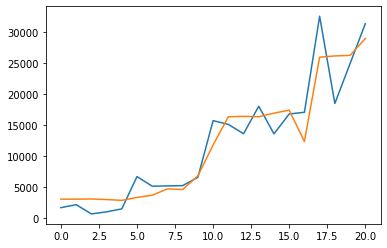

14/26a
14/26b
14/29
14/29a
15/16


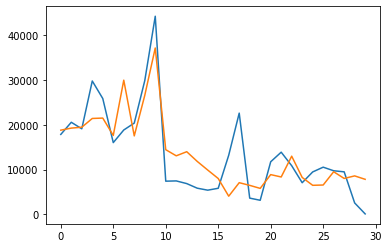

15/18a
15/21
15/21a


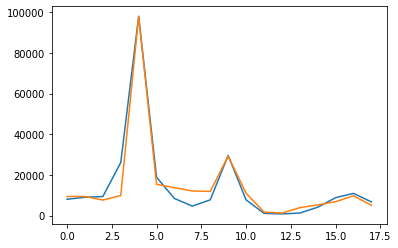

15/21b
15/22


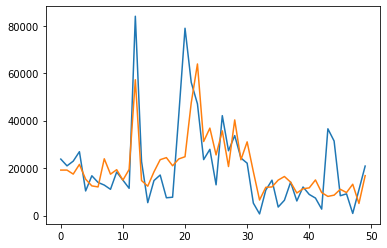

15/24b


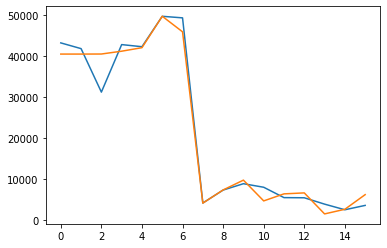

15/27


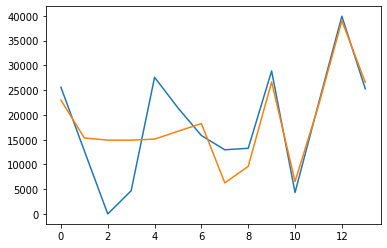

15/28b
20/02
21/12
21/15a
21/18
21/19
21/20a
21/20b
21/23b
21/24


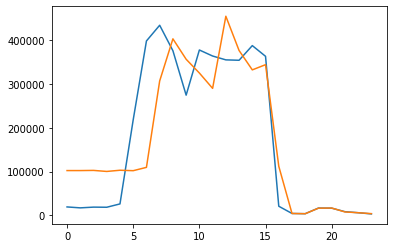

21/25


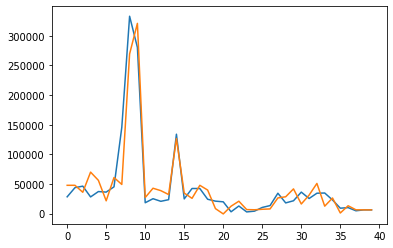

21/29a
21/30


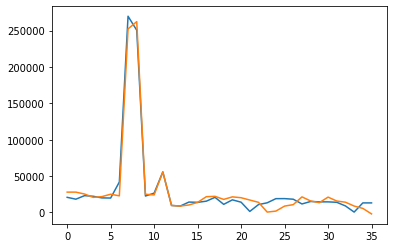

22/06a


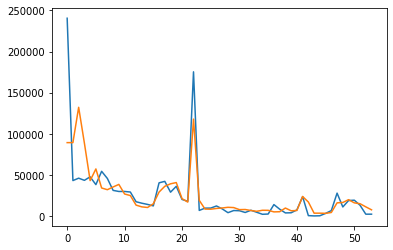

22/11


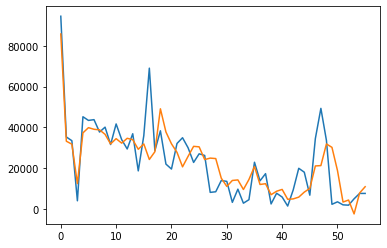

22/12a
22/14b
22/21
22/22b
22/24a
22/24b
22/24d
22/26a
22/29


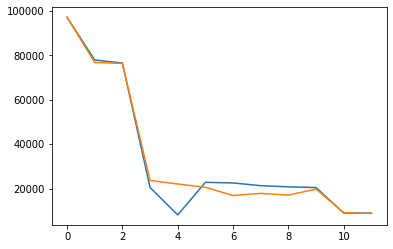

22/29c
22/30a


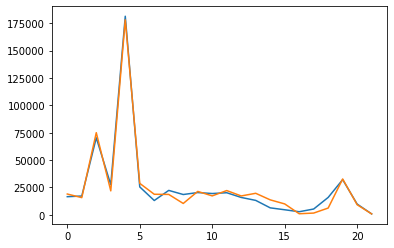

22/30b


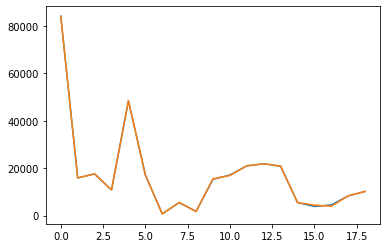

23/16b
23/22a


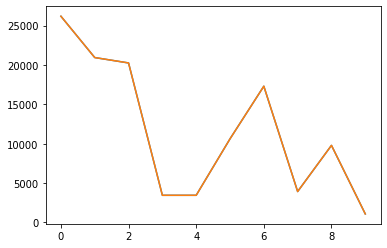

23/27
23/27a
29/03a
29/03c


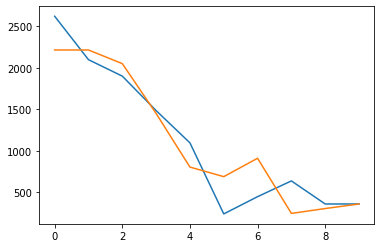

29/05b


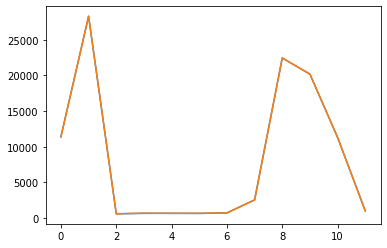

29/07
30/06
30/07a


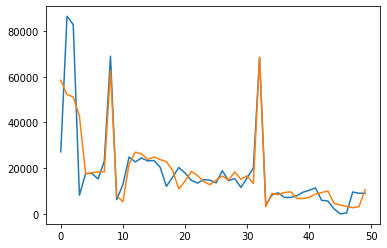

30/14
30/16


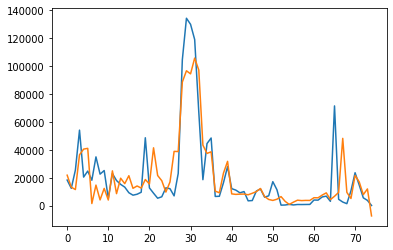

30/17a


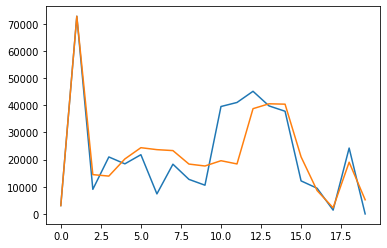

30/19a


In [416]:
scores = {}
for k in model_preds.keys(): 
    print(k)
    if len(model_preds[k][1]) < 10:
        continue
    scores[k] = mse(model_preds[k][0], model_preds[k][1]) ** 0.5
    plt.plot(model_preds[k][0])
    plt.plot(model_preds[k][1])
    plt.show()

In [394]:
scores

{'14/20b': 3077.9765572019633,
 '15/16': 5727.768050573591,
 '15/21a': 4765.171948561433,
 '15/22': 12624.595131320191,
 '15/24b': 2925.8810430262315,
 '15/27': 6513.298799443897,
 '21/24': 87798.82056519404,
 '21/25': 23554.11783750197,
 '21/30': 8421.466527641416,
 '22/06a': 27293.345602758684,
 '22/11': 10899.754977559513,
 '22/29': 4730.004713649209,
 '22/30a': 4490.292666128466,
 '22/30b': 198.72735565412214,
 '23/22a': 1.1869689879398468e-11,
 '29/03c': 293.0883644673257,
 '29/05b': 17.62152459897323,
 '30/07a': 10044.935079316067,
 '30/16': 15570.341783579901,
 '30/17a': 8808.915024261174}

In [395]:
all_feats = features + prop_feats1 + prop_feats2 + prop_feats3

In [404]:
feat_imp = {}
for k in scores.keys(): 
    feat_imp[k] = dict(zip(all_feats, models[k].coef_))
    mval = max(feat_imp[k].values())
    for fi in feat_imp[k].keys(): 
#         feat_imp[k][fi] = abs(feat_imp[k][fi] / data[data['block'] == k][fi].mean())
        
        feat_imp[k][fi] = abs(feat_imp[k][fi]) / mval
        

In [405]:
for k in scores.keys():
    for f in ['feat_sh_1', 'feat_sh_2', 'feat_sh_4', 'feat_sh_8']: 
        feat_imp[k].pop(f, None)
    

In [406]:
max(feat_imp[k].values())

0.09911917857109653

In [408]:
import pickle

In [412]:
with open('feature_importance.pkl', 'wb') as f: 
    pickle.dump(feat_imp, f)

In [417]:
with open('model_predicts.pkl', 'wb') as f: 
    pickle.dump(model_preds, f)

In [407]:
feat_imp

{'14/20b': {'GAS_C11': 1.0133294928467587e-15,
  'GAS_C21': 5.066647464233794e-16,
  'C2_UNSAT1': 6.333309330292242e-17,
  'GAS_C31': 0.0,
  'C3_UNSAT1': 3.3750652034706132e-31,
  'GAS_IC41': 5.625108672451022e-32,
  'GAS_NC41': 1.2989860341481446e-45,
  'C4_UNSAT1': 4.996100131339018e-47,
  'GAS_NEOC51': 2.498050065669509e-47,
  'GAS_IC51': 3.549942655453022e-61,
  'GAS_NC51': 3.549942655453022e-61,
  'C5_UNSAT1': 1.3866963497863366e-63,
  'GAS_NC5_PLUS1': 3.941228072182914e-77,
  'GAS_C6PLUS1': 3.941228072182914e-77,
  'GAS_O21': 3.6949013176714817e-78,
  'GAS_CO21': 0.0,
  'GAS_C12': 0.0,
  'GAS_C22': 0.0,
  'C2_UNSAT2': 0.0,
  'GAS_C32': 0.0,
  'C3_UNSAT2': 0.0,
  'GAS_IC42': 0.0,
  'GAS_NC42': 0.0,
  'C4_UNSAT2': 0.0,
  'GAS_NEOC52': 0.0,
  'GAS_IC52': 0.0,
  'GAS_NC52': 0.0,
  'C5_UNSAT2': 0.0,
  'GAS_NC5_PLUS2': 0.0,
  'GAS_C6PLUS2': 0.0,
  'GAS_O22': 0.0,
  'GAS_CO22': 0.0,
  'GAS_C13': 0.009993180661942998,
  'GAS_C23': 0.009993180661943274,
  'C2_UNSAT3': 0.0,
  'GAS_C33': 0.

In [414]:
model_preds

{'13/23': (array([387971.7468 , 349953.90892,  12464.56425,  26478.153  ]),
  array([368962.82786, 368962.82786,  12464.56425,  26478.153  ])),
 '14/20b': (array([ 1736.8       ,  2219.088     ,   727.75      ,  1063.3       ,
          1540.27316   ,  6741.8847    ,  5192.6542    ,  5233.6068    ,
          5285.44584   ,  6620.96133333, 15751.27393   , 15143.3469    ,
         13642.5164    , 18068.6792    , 13620.838     , 16822.5982    ,
         17094.94536324, 32563.5       , 18524.0724    , 24934.52805   ,
         31344.9837    ]),
  array([ 3106.74368227,  3106.74368227,  3135.39096131,  3041.27467654,
          2912.18762876,  3383.49457233,  3742.84116594,  4758.28801075,
          4659.36670842,  6860.79367939, 11829.402721  , 16360.72795214,
         16440.18782521, 16376.31350156, 16957.4555621 , 17442.15755087,
         12392.59214572, 25967.29380919, 26173.32101307, 26263.01073355,
         28963.45859419])),
 '14/26a': (array([ 9789.78      , 13135.706     , 12980.4986

In [325]:
from sklearn.metrics import mean_squared_error as mse

In [326]:
total_true = []
total_pred = []
for k in model_preds.keys(): 
    total_true += list(model_preds[k][0])
    total_pred += list(model_preds[k][1])

In [329]:
mse(total_true, total_pred)  ** 0.5

38341.24349040146

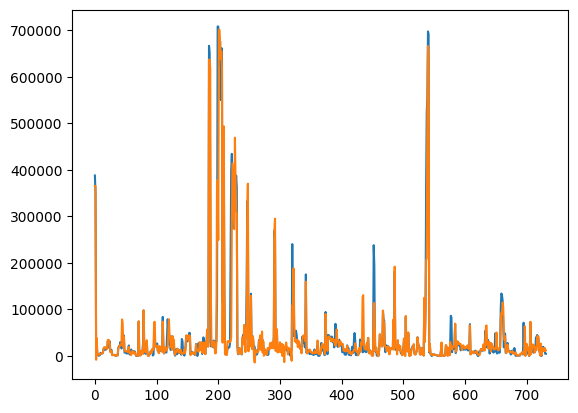

In [485]:
plt.plot(total_true)
plt.plot(total_pred)

In [279]:
data[data['block'] == '14/20b']

date   block  OILPRODMAS  OILPRODM3  OILPRDDENS  OILPRODMBD  \
213 2000-01-01  14/20b      0.0000        0.0         0.0    0.000000   
214 2000-02-01  14/20b      0.0000        0.0         0.0    0.000000   
215 2000-03-01  14/20b      0.0000        0.0         0.0    0.000000   
216 2000-04-01  14/20b      0.0000        0.0         0.0    0.000000   
217 2000-05-01  14/20b      0.0000        0.0         0.0    0.000000   
218 2000-06-01  14/20b      0.0000        0.0         0.0    0.000000   
219 2000-07-01  14/20b      0.0000        0.0         0.0    0.000000   
220 2000-08-01  14/20b      0.0000        0.0         0.0    0.000000   
221 2000-09-01  14/20b      0.0000        0.0         0.0    0.000000   
222 2000-10-01  14/20b      0.0000        0.0         0.0    0.000000   
223 2000-11-01  14/20b      0.0000        0.0         0.0    0.000000   
224 2000-12-01  14/20b      0.0000        0.0         0.0    0.000000   
225 2001-01-01  14/20b      0.0000        0.0         0.0    0.000000   
226 2001-02-01  14/20b      0.0000        0.0         0.0    0.000000   
227 2001-03-01  14/20b      0.0000        0.0         0.0    0.000000   
228 2001-04-01  14/20b      0.0000        0.0         0.0    0.000000   
229 2001-05-01  14/20b      0.0000        0.0         0.0    0.000000   
230 2001-06-01  14/20b      0.0000        0.0         0.0    0.000000   
231 2001-07-01  14/20b      0.0000        0.0         0.0    0.000000   
232 2001-08-01  14/20b      0.0000        0.0         0.0    0.000000   
233 2001-09-01  14/20b      0.0000        0.0         0.0    0.000000   
234 2001-10-01  14/20b      0.0000        0.0         0.0    0.000000   
235 2001-11-01  14/20b      0.0000        0.0         0.0    0.000000   
236 2001-12-01  14/20b      0.0000        0.0         0.0    0.000000   
237 2002-01-01  14/20b      0.0000        0.0         0.0    0.000000   
238 2002-02-01  14/20b      0.0000        0.0         0.0    0.000000   
239 2002-03-01  14/20b      0.0000        0.0         0.0    0.000000   
240 2002-04-01  14/20b      0.0000        0.0         0.0    0.000000   
241 2002-05-01  14/20b      0.0000        0.0         0.0    0.000000   
242 2002-06-01  14/20b      0.0000        0.0         0.0    0.000000   
..         ...     ...         ...        ...         ...         ...   
396 2015-04-01  14/20b      0.0000        0.0         0.0    0.000000   
397 2015-05-01  14/20b      0.0000        0.0         0.0    0.000000   
398 2015-06-01  14/20b      0.0000        0.0         0.0    0.000000   
399 2015-07-01  14/20b      0.0000        0.0         0.0    0.000000   
400 2015-08-01  14/20b      0.0000        0.0         0.0    0.000000   
401 2015-09-01  14/20b      0.0000        0.0         0.0    0.000000   
402 2015-10-01  14/20b      0.0000        0.0         0.0    0.000000   
403 2015-11-01  14/20b      0.0000        0.0         0.0    0.000000   
404 2015-12-01  14/20b      0.0000        0.0         0.0    0.000000   
405 2016-01-01  14/20b      0.0000        0.0         0.0    0.000000   
406 2016-02-01  14/20b      0.0000        0.0         0.0    0.000000   
407 2016-03-01  14/20b      0.0000        0.0         0.0    0.000000   
408 2016-04-01  14/20b      0.0000        0.0         0.0    0.000000   
409 2016-05-01  14/20b      0.0000        0.0         0.0    0.000000   
410 2016-06-01  14/20b      0.0000        0.0         0.0    0.000000   
411 2016-07-01  14/20b      0.0000        0.0         0.0    0.000000   
412 2016-08-01  14/20b      0.0000        0.0         0.0    0.000000   
413 2016-09-01  14/20b      0.0000        0.0         0.0    0.000000   
414 2016-10-01  14/20b      0.0000        0.0         0.0    0.000000   
415 2016-11-01  14/20b      0.0000        0.0         0.0    0.000000   
416 2016-12-01  14/20b      0.0000        0.0         0.0    0.000000   
417 2017-01-01  14/20b      0.0000        0.0         0.0    0.000000   
418 2017-02-01  14/20b      0.0000        0.0         0.0    0.00000

# predict all

In [428]:
all_feats = features + prop_feats1 + prop_feats2 + prop_feats3

In [429]:
def get_pred(target): 
    model_preds = {}
    models = {}
    for i, g in data.groupby('block'): 
        if any(g[features + ['oilprod']].isnull().sum() > 0): 
            print(f'skippend {i}')
            continue
        x = g.loc[(~data['is_oil'].isnull()), features + prop_feats1 + prop_feats2 + prop_feats3].values
        y = g.loc[(~data['is_oil'].isnull()), target].values
        scaler = StandardScaler()
        lr = LinearRegression(normalize=True).fit(scaler.fit_transform(x), y)
        models[i] = lr
        pred = lr.predict(scaler.transform(g.loc[(~data['is_oil'].isnull()), features + prop_feats1 + prop_feats2 + prop_feats3]))
        model_preds[i] = (
            g.loc[(~data['is_oil'].isnull()), target].values, 
            pred, 
            g.loc[(~data['is_oil'].isnull()), 'date'].values,
        )
    scores = {}
    for k in model_preds.keys(): 
        print(k)
        if len(model_preds[k][1]) < 10:
            continue
        scores[k] = mse(model_preds[k][0], model_preds[k][1]) ** 0.5
    feat_imp = {}
    for k in scores.keys(): 
        feat_imp[k] = dict(zip(all_feats, models[k].coef_))
        mval = max(feat_imp[k].values())
        for fi in feat_imp[k].keys(): 
    #         feat_imp[k][fi] = abs(feat_imp[k][fi] / data[data['block'] == k][fi].mean())

            feat_imp[k][fi] = abs(feat_imp[k][fi]) / mval
    for k in scores.keys():
        for f in ['feat_sh_1', 'feat_sh_2', 'feat_sh_4', 'feat_sh_8']: 
            feat_imp[k].pop(f, None)
    return model_preds, feat_imp

In [419]:
target

'target'

In [430]:
out = []
for t in targets: 
    out.append(get_pred(t))

skippend 15/17b
skippend 20/04
skippend 20/08
skippend 21/02
skippend 21/12a
skippend 21/24a
skippend 21/25a
skippend 21/25b
skippend 21/30b
skippend 21/30d
skippend 21/30f
skippend 22/07
skippend 22/11a
skippend 22/12c
skippend 22/13a
skippend 22/24
skippend 29/05
skippend 29/07a
skippend 29/08a
skippend 29/09a
skippend 29/09b
skippend 29/10
13/23
14/20b
14/26a
14/26b
14/29
14/29a
15/16
15/18a
15/21
15/21a
15/21b
15/22
15/24b
15/27
15/28b
20/02
21/12
21/15a
21/18
21/19
21/20a
21/20b
21/23b
21/24
21/25
21/29a
21/30
22/06a
22/11
22/12a
22/14b
22/21
22/22b
22/24a
22/24b
22/24d
22/26a
22/29
22/29c
22/30a
22/30b
23/16b
23/22a
23/27
23/27a
29/03a
29/03c
29/05b
29/07
30/06
30/07a
30/14
30/16
30/17a
30/19a
skippend 15/17b
skippend 20/04
skippend 20/08
skippend 21/02
skippend 21/12a
skippend 21/24a
skippend 21/25a
skippend 21/25b
skippend 21/30b
skippend 21/30d
skippend 21/30f
skippend 22/07
skippend 22/11a
skippend 22/12c
skippend 22/13a
skippend 22/24
skippend 29/05
skippend 29/07a
skippend 

In [434]:
out[1][0]

{'13/23': (array([23940.433 , 22517.8297,  7536.8   ,  1004.    ]),
  array([23229.13135, 23229.13135,  7536.8    ,  1004.     ]),
  array(['2001-06-01T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
         '2002-05-01T00:00:00.000000000', '2002-09-01T00:00:00.000000000'],
        dtype='datetime64[ns]')),
 '14/20b': (array([ 4220.        ,  4958.4       ,  3066.4       ,  3320.        ,
         10593.92      , 51415.57      , 59437.23      , 44198.92      ,
         43597.016     , 36864.97777778,  2216.88      ,   555.        ,
           499.        ,   663.        ,   500.        ,   619.        ,
          1555.79879412, 60717.78      , 36097.245     ,    77.004     ,
         56269.763     ]),
  array([24321.16538624, 24321.16538624, 27072.41779679, 26722.44081671,
         19902.76570704, 26327.54729748, 25777.2567485 , 34574.42447074,
         18598.6284803 , 18713.6546384 , 16384.50319253,  4517.39407582,
          4395.63664088, -9491.77559252, -4906.42944101, 15318.

13/23


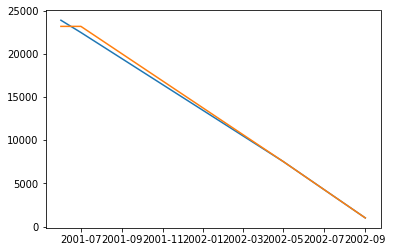

14/20b


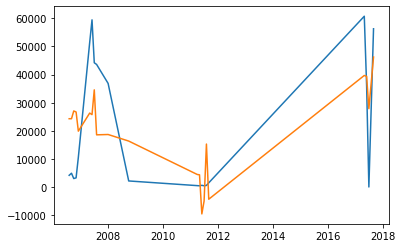

14/26a


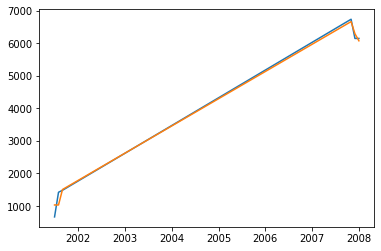

14/26b


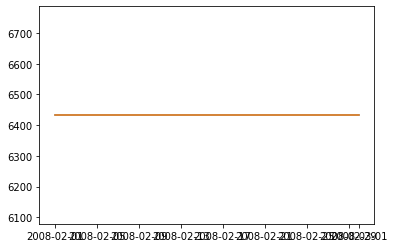

14/29


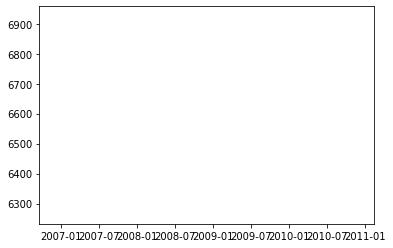

14/29a


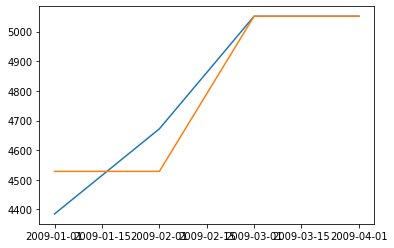

15/16


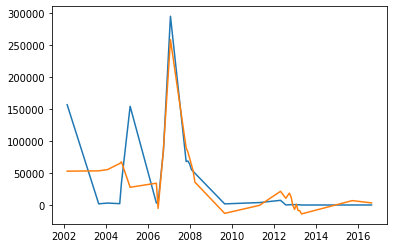

15/18a


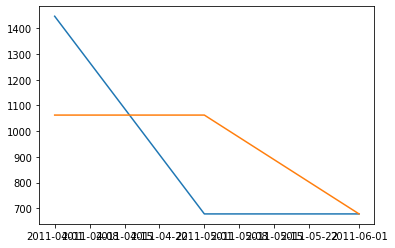

15/21


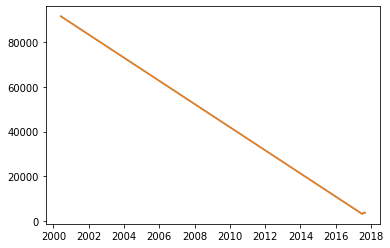

15/21a


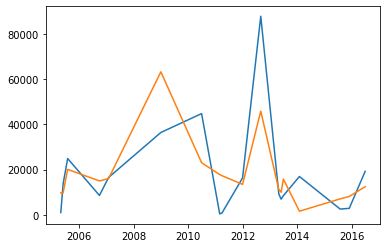

15/21b


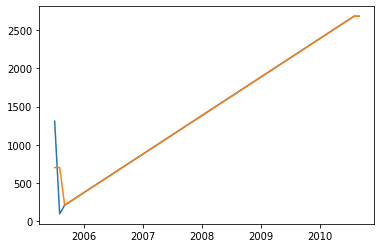

15/22


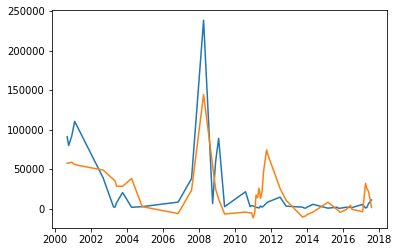

15/24b


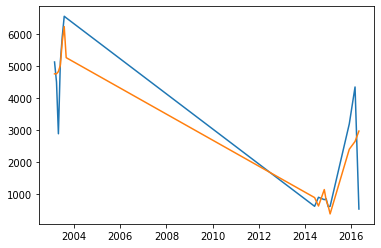

15/27


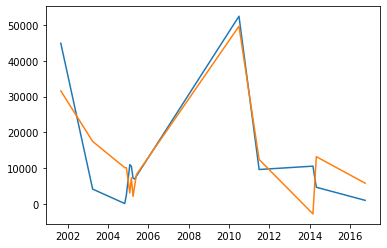

15/28b


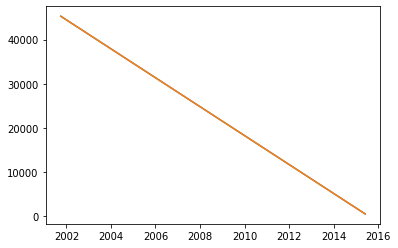

20/02


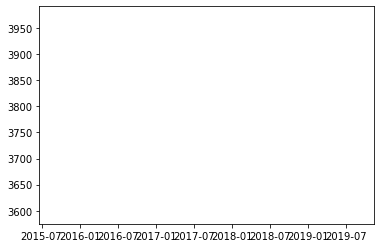

21/12


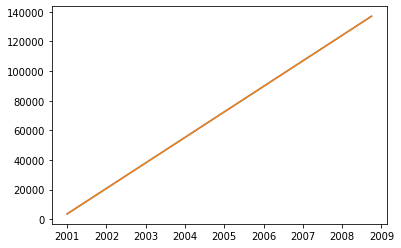

21/15a


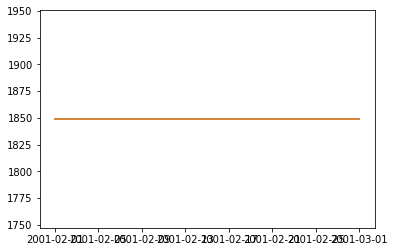

21/18


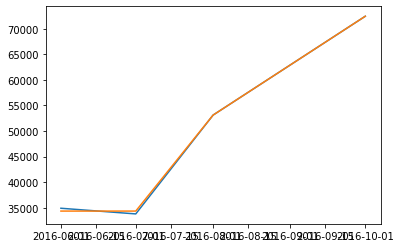

21/19


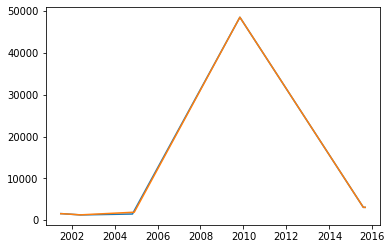

21/20a


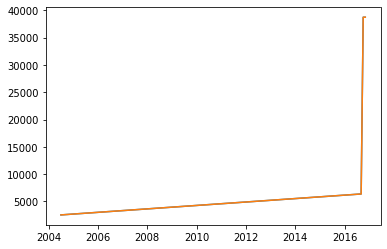

21/20b


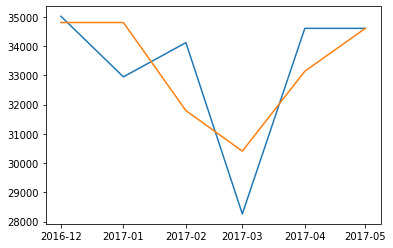

21/23b


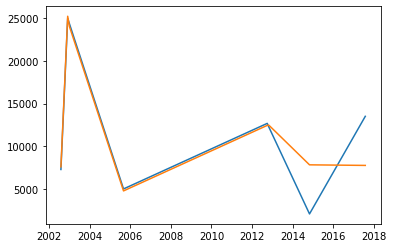

21/24


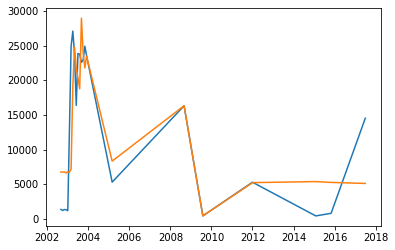

21/25


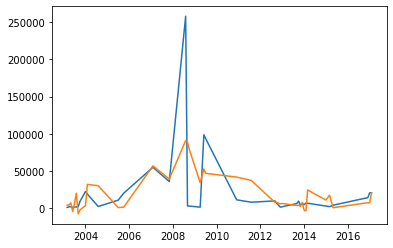

21/29a


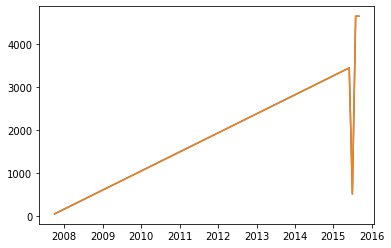

21/30


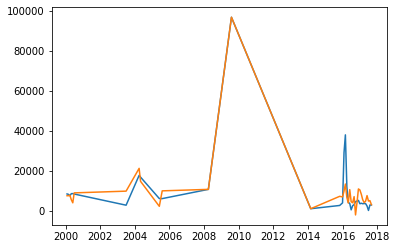

22/06a


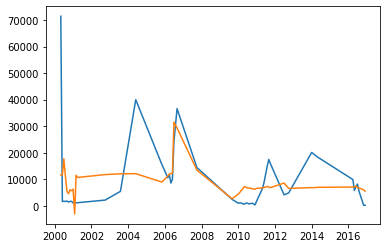

22/11


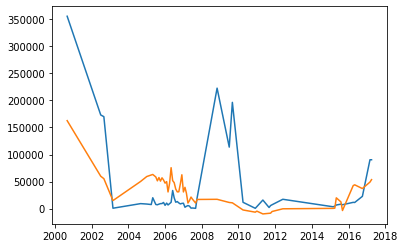

22/12a


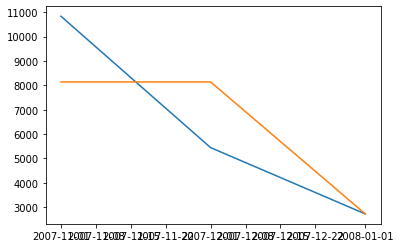

22/14b


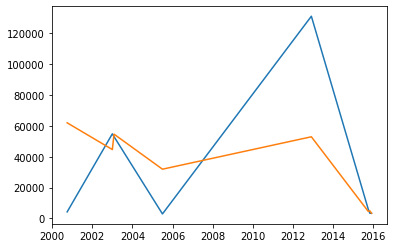

22/21


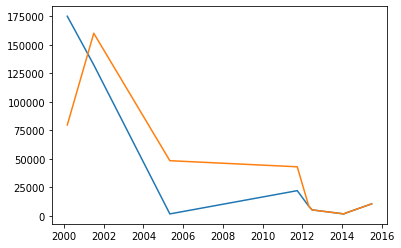

22/22b


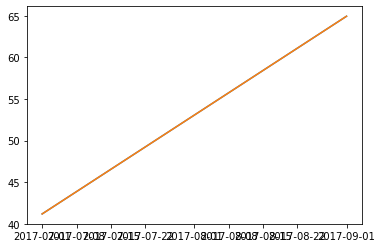

22/24a


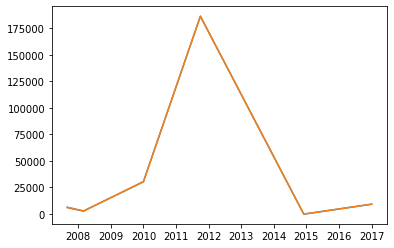

22/24b


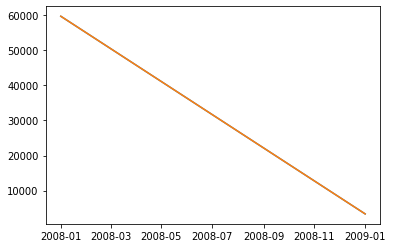

22/24d


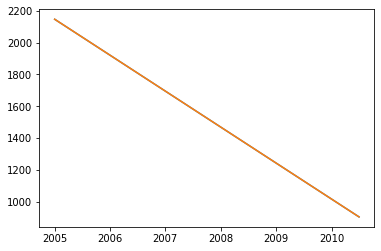

22/26a


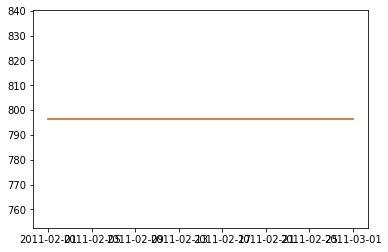

22/29


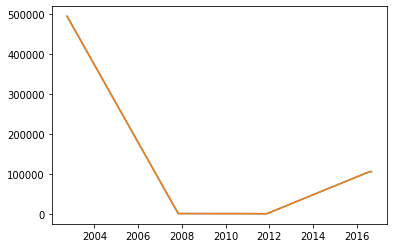

22/29c


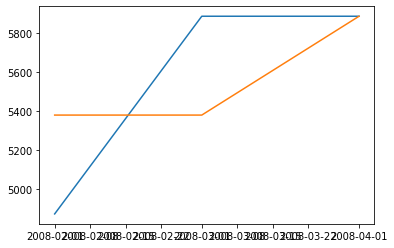

22/30a


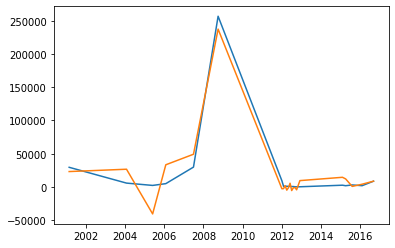

22/30b


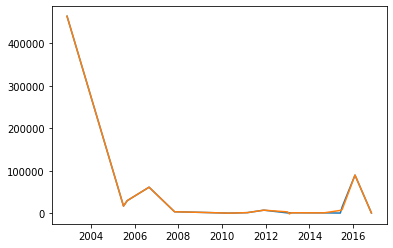

23/16b


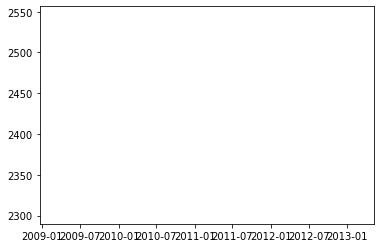

23/22a


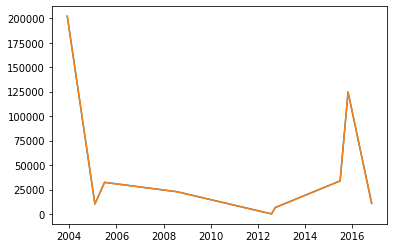

23/27


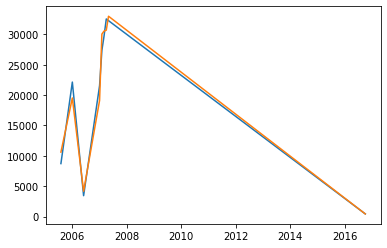

23/27a


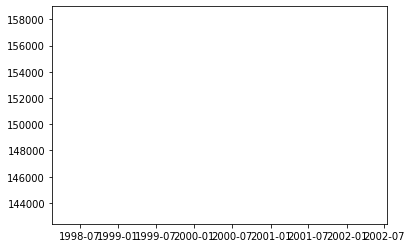

29/03a


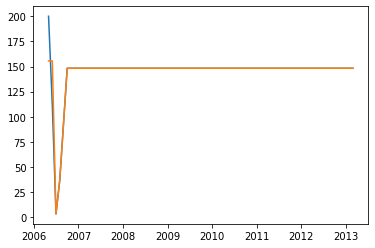

29/03c


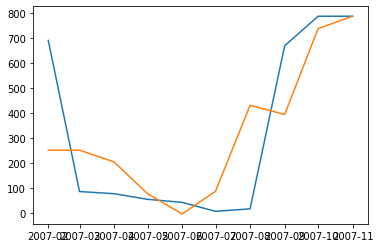

29/05b


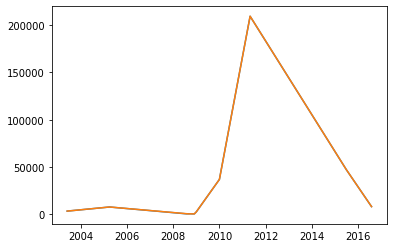

29/07


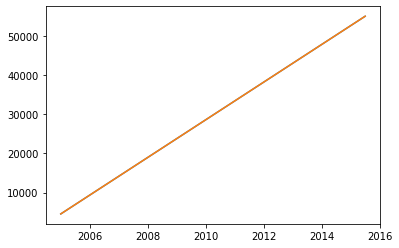

30/06


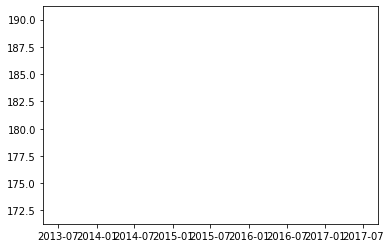

30/07a


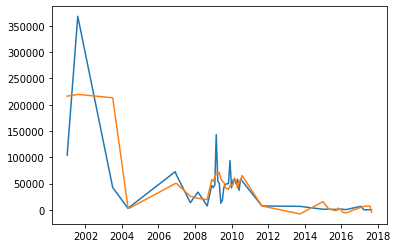

30/14


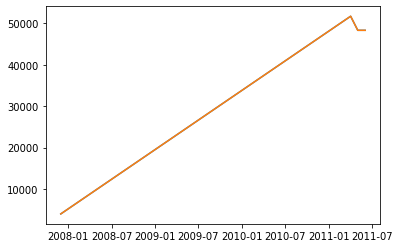

30/16


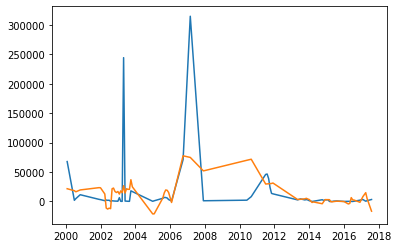

30/17a


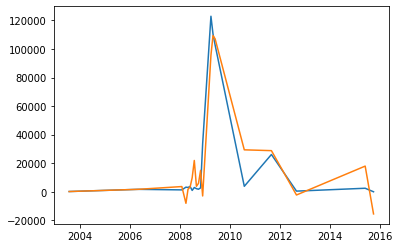

30/19a


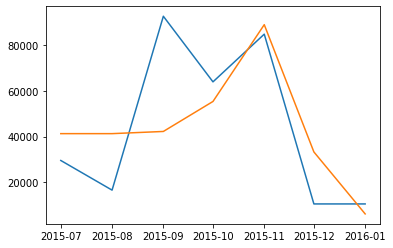

In [441]:
for k in out[1][0].keys(): 
    print(k)
    plt.plot(out[1][0][k][2], out[1][0][k][0])
    plt.plot(out[1][0][k][2], out[1][0][k][1])
    plt.show()

In [450]:
from copy import copy

In [451]:
m_plot = copy(out[1][1]['30/07a'])

In [452]:
m_n = list(m_plot.keys())
m_v = list(m_plot.values())

In [476]:
mmm = np.array([(x, y) for y, x in sorted(zip(m_v, m_n), reverse=False)][-10:])

In [477]:
mmm

array([['C3_UNSAT2', '0.23883197351432028'],
       ['GAS_C21', '0.2799222283433064'],
       ['GAS_CO22', '0.3122510079565325'],
       ['GAS_C6PLUS2', '0.31603025352203956'],
       ['GAS_C31', '0.46938947198074726'],
       ['GAS_NC41', '0.5876034862712506'],
       ['GAS_IC41', '0.7766421849345638'],
       ['GAS_NC51', '0.786194171830203'],
       ['GAS_IC51', '0.9240366458131831'],
       ['GAS_C11', '1.0']], dtype='<U19')

<BarContainer object of 10 artists>

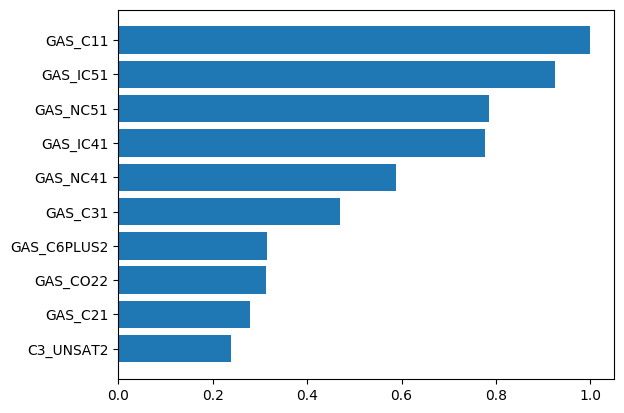

In [479]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(0, 1, 0.1)
ax.barh(mmm[:, 0], mmm[:, 1].astype(float))
# ax.set_xticks(y_pos)

<BarContainer object of 10 artists>

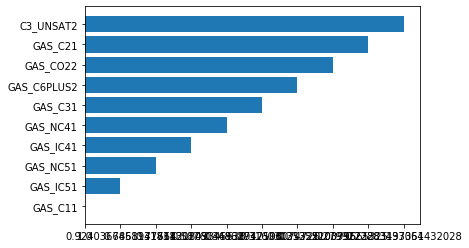

In [462]:
plt.barh(, )

TypeError: bar() missing 1 required positional argument: 'height'

13/23


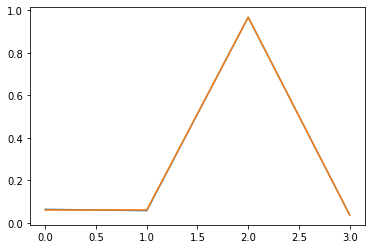

14/20b


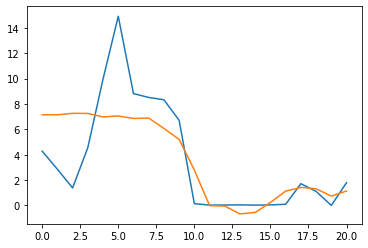

14/26a


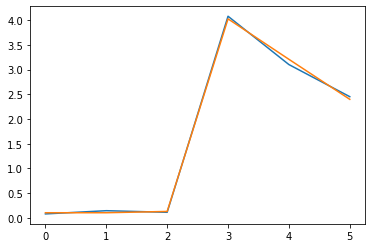

14/26b


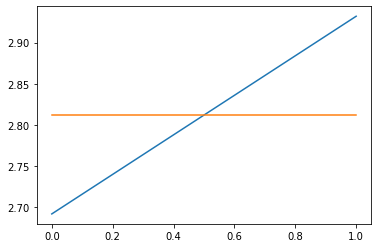

14/29


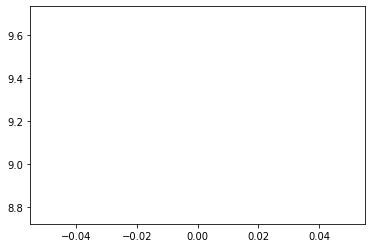

14/29a


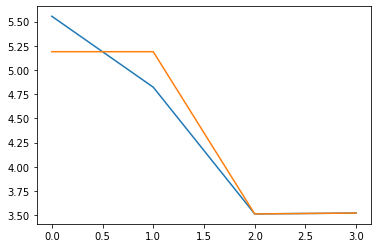

15/16


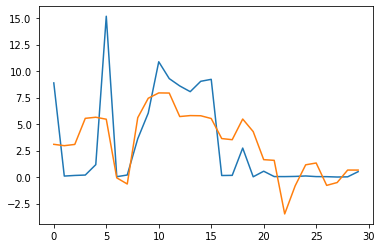

15/18a


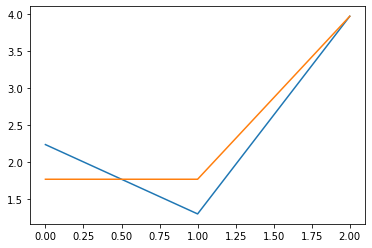

15/21


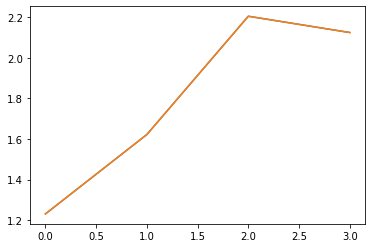

15/21a


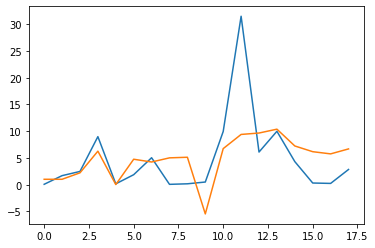

15/21b


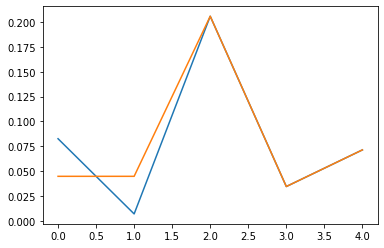

15/22


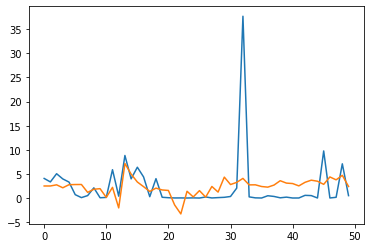

15/24b


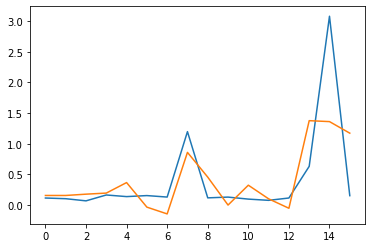

15/27


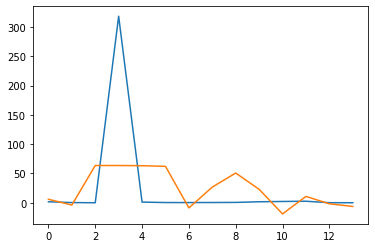

15/28b


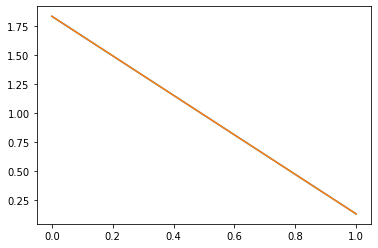

20/02


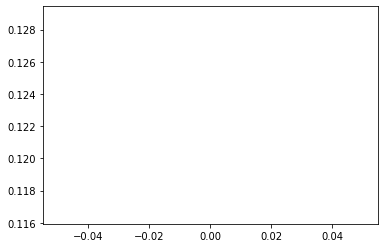

21/12


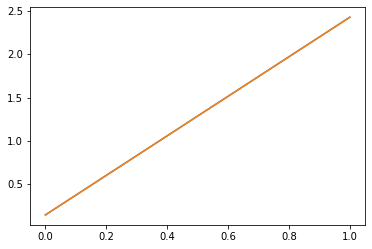

21/15a


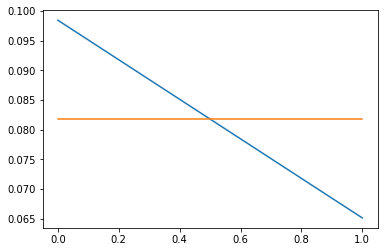

21/18


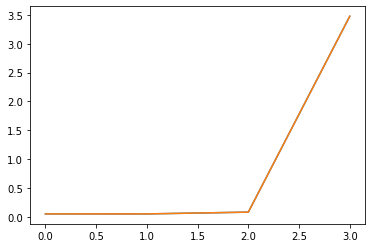

21/19


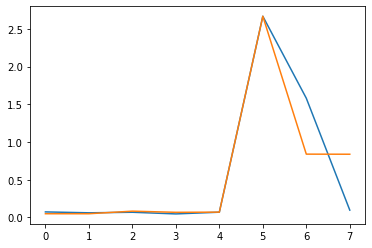

21/20a


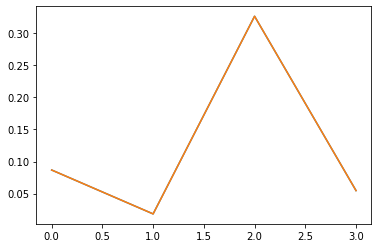

21/20b


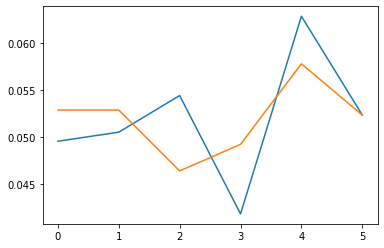

21/23b


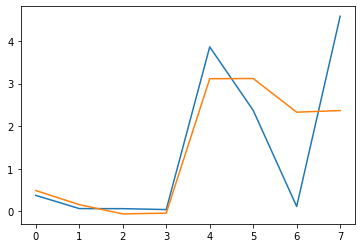

21/24


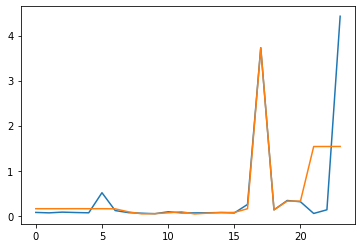

21/25


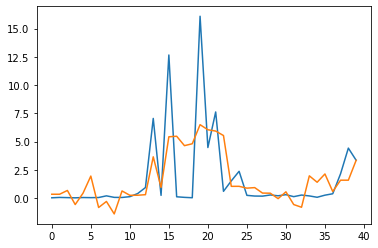

21/29a


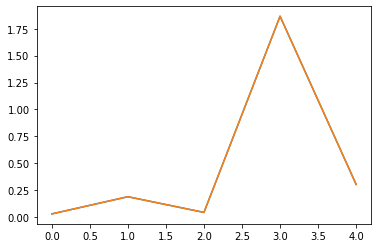

21/30


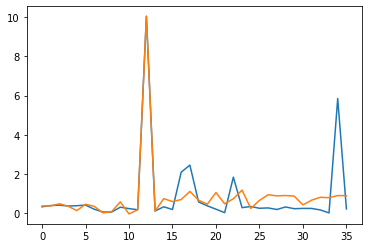

22/06a


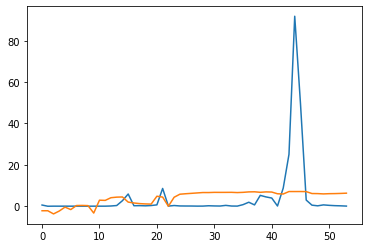

22/11


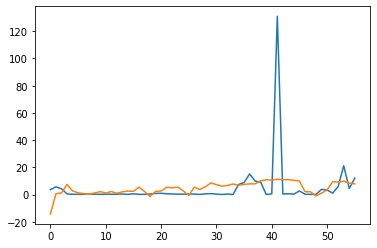

22/12a


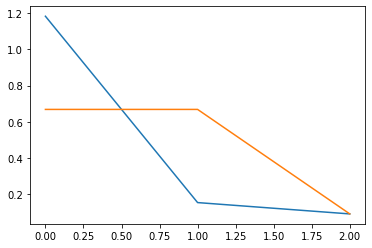

22/14b


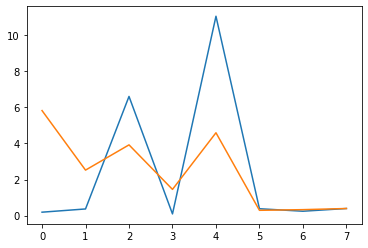

22/21


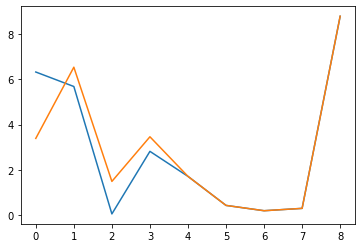

22/22b


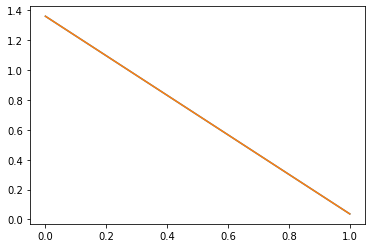

22/24a


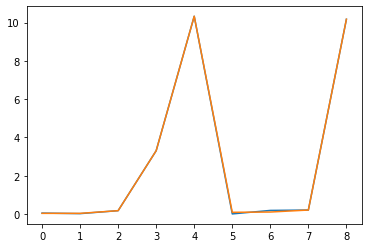

22/24b


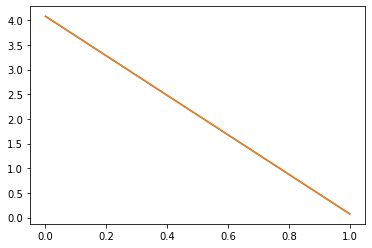

22/24d


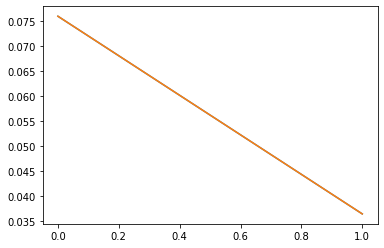

22/26a


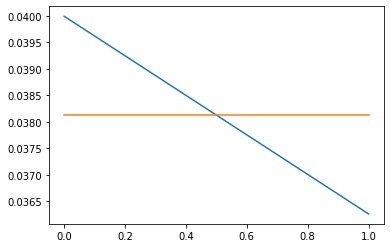

22/29


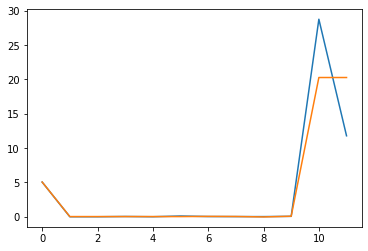

22/29c


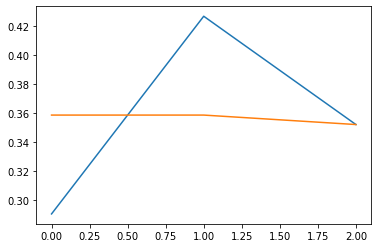

22/30a


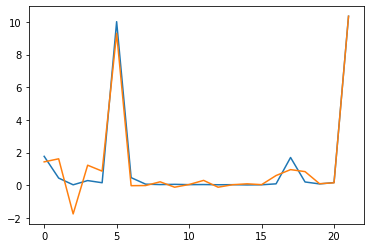

22/30b


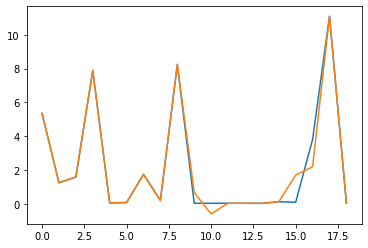

23/16b


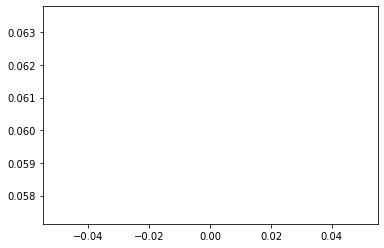

23/22a


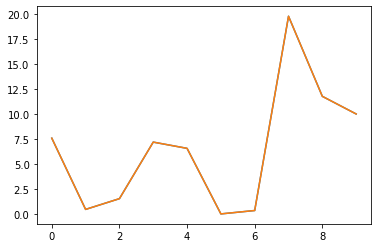

23/27


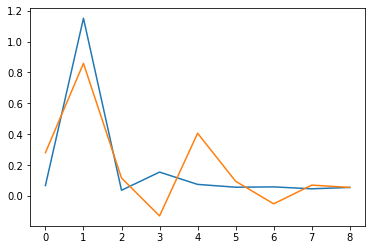

23/27a


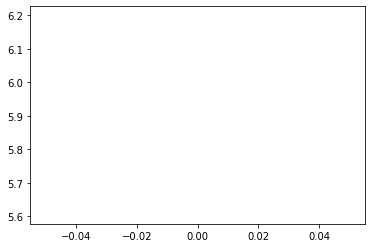

29/03a


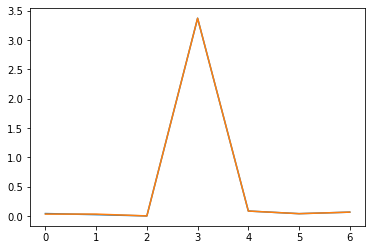

29/03c


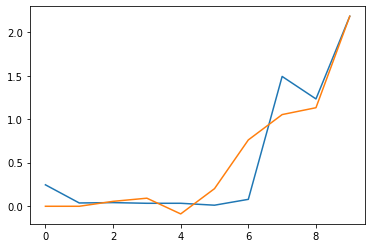

29/05b


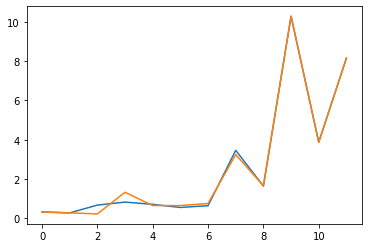

29/07


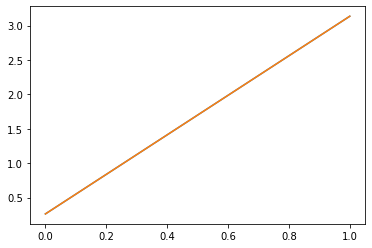

30/06


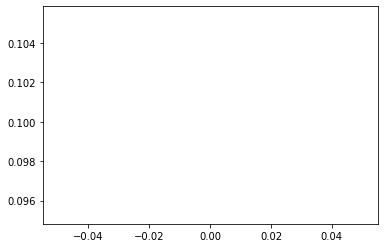

30/07a


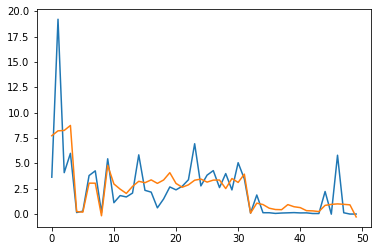

30/14


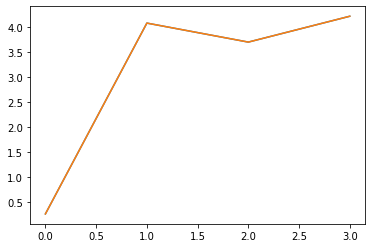

30/16


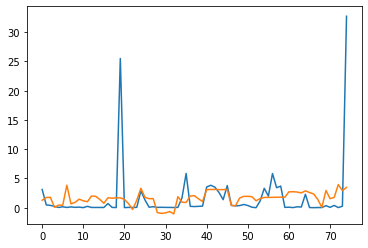

30/17a


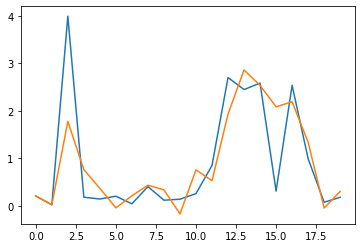

30/19a


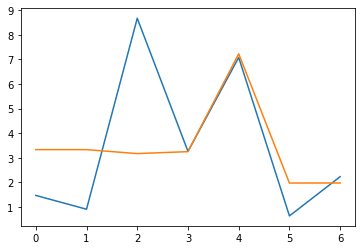

In [438]:
for k in out[2][0].keys(): 
    print(k)
    plt.plot(out[2][0][k][0])
    plt.plot(out[2][0][k][1])
    plt.show()

In [439]:
final_result = {
    'oil': out[0], 
    'gas': out[1], 
    'gas/oil': out[2], 
}

In [440]:
with open('all_model_predicts.pkl', 'wb') as f: 
    pickle.dump(final_result, f)

In [222]:
dists = np.array(dists)

In [229]:
d = list(dists[:, 0])

In [230]:
d.sort(key=lambda x: list(dists[:, 1])[1])

In [231]:
d

['14/29a',
 '15/18a',
 '21/20b',
 '21/25',
 '21/25a',
 '21/30',
 '21/30d',
 '22/06a',
 '22/11',
 '22/11a',
 '22/13a',
 '22/21',
 '22/24d',
 '22/29',
 '22/30a',
 '22/30b',
 '23/16b',
 '23/22a',
 '23/27',
 '23/27a',
 '29/03a',
 '29/03c']

In [226]:
np.sort(dists, axis=0)

array([['14/29a', '1.1821310934515799'],
       ['15/18a', '1.9627842022769428'],
       ['21/20b', '2.4225824397646334'],
       ['21/25', '2.5810019046450208'],
       ['21/25a', '2.5902596898098134'],
       ['21/30', '2.639818329270028'],
       ['21/30d', '2.6529078818121117'],
       ['22/06a', '2.6554648850806877'],
       ['22/11', '2.6671863803445617'],
       ['22/11a', '2.6998358883768168'],
       ['22/13a', '2.7099175511798856'],
       ['22/21', '2.847366125263279'],
       ['22/24d', '3.226322218278474'],
       ['22/29', '3.229019407932129'],
       ['22/30a', '3.2704964809200185'],
       ['22/30b', '3.311188287223665'],
       ['23/16b', '3.602727000934507'],
       ['23/22a', '3.603501511891806'],
       ['23/27', '3.621554036048566'],
       ['23/27a', '3.854379080584989'],
       ['29/03a', '3.883027005265064'],
       ['29/03c', '3.8834942968935575']], dtype='<U18')

In [197]:
blocks.keys()

dict_keys(['13/23', '14/20b', '14/26a', '14/26b', '14/29', '14/29a', '15/16', '15/17b', '15/18a', '15/21', '15/21a', '15/21b', '15/22', '15/24b', '15/27', '15/28b', '20/02', '20/04', '20/08', '21/02', '21/12', '21/12a', '21/15a', '21/18', '21/19', '21/20a', '21/20b', '21/23b', '21/24', '21/24a', '21/25', '21/25a', '21/25b', '21/29a', '21/30', '21/30b', '21/30d', '21/30f', '22/06a', '22/07', '22/11', '22/11a', '22/12a', '22/12c', '22/13a', '22/14b', '22/21', '22/22b', '22/24', '22/24a', '22/24b', '22/24d', '22/26a', '22/29', '22/29c', '22/30a', '22/30b', '23/16b', '23/22a', '23/27', '23/27a', '29/03a', '29/03c', '29/05', '29/05b', '29/07', '29/07a', '29/08a', '29/09a', '29/09b', '29/10', '30/06', '30/07a', '30/14', '30/16', '30/17a', '30/19a'])

In [198]:
k = '15/24b'

In [200]:
blocks[k]['WH_LONG']

2769    0.730807
2770         NaN
2771         NaN
2772         NaN
2773         NaN
2774         NaN
2775         NaN
2776         NaN
2777         NaN
2778         NaN
2779         NaN
2780         NaN
2781         NaN
2782         NaN
2783         NaN
2784         NaN
2785         NaN
2786         NaN
2787         NaN
2788         NaN
2789         NaN
2790         NaN
2791         NaN
2792         NaN
2793         NaN
2794         NaN
2795         NaN
2796         NaN
2797         NaN
2798         NaN
          ...   
2952         NaN
2953         NaN
2954         NaN
2955         NaN
2956         NaN
2957         NaN
2958         NaN
2959         NaN
2960         NaN
2961         NaN
2962         NaN
2963         NaN
2964         NaN
2965         NaN
2966         NaN
2967         NaN
2968         NaN
2969         NaN
2970         NaN
2971         NaN
2972         NaN
2973         NaN
2974         NaN
2975         NaN
2976         NaN
2977         NaN
2978         NaN
2979         N

In [ ]:
model_preds = {}
for i, g in data.groupby('block'): 
    if any(g[features].isnull().sum() > 0): 
        print(f'skippend {i}')
        continue
    x = g[features].values
    y = g[target].values
    lr = LinearRegression().fit(x, y)
    pred = lr.predict(g.loc[(~data['is_oil'].isnull()), features])
    model_preds[i] = (g.loc[(~data['is_oil'].isnull()), target].values, pred)
    print(f'done {i}')

13/23


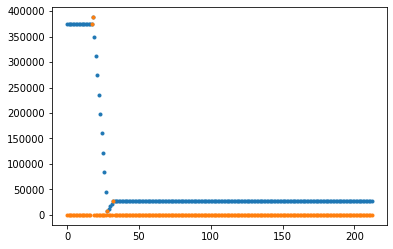

14/20b


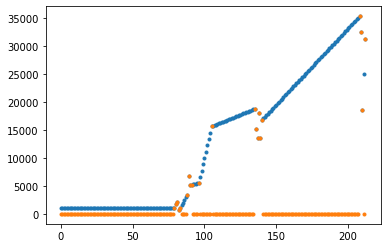

14/26a


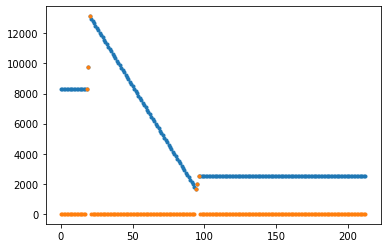

14/26b


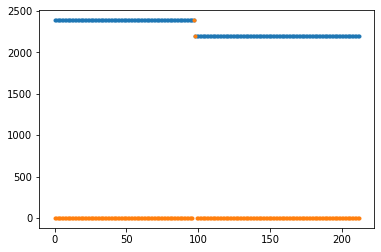

14/29


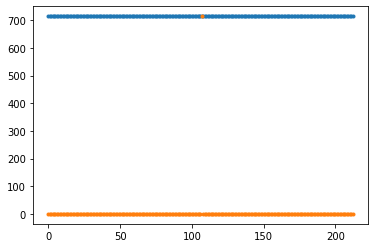

14/29a


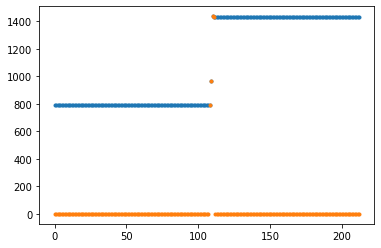

15/16


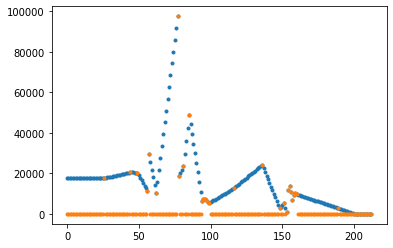

15/17b


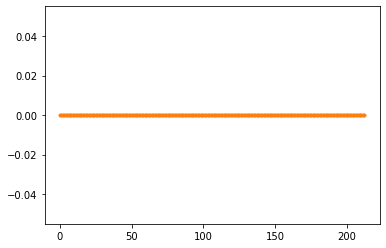

15/18a


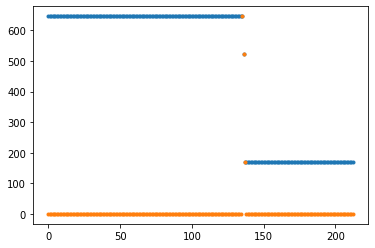

15/21


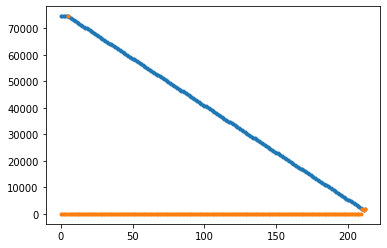

15/21a


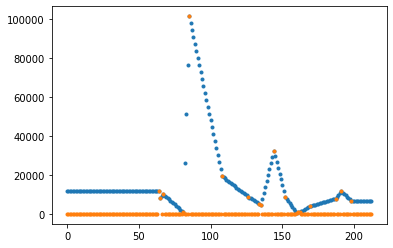

15/21b


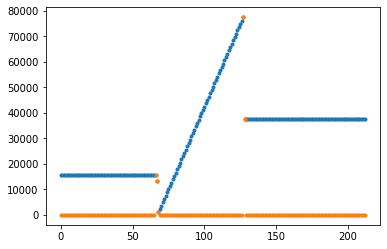

15/22


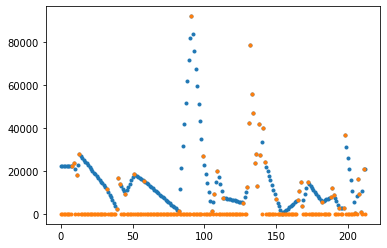

15/24b


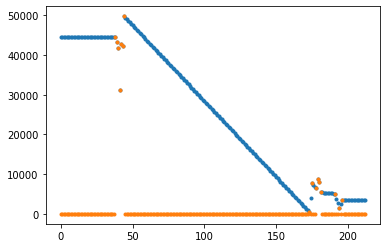

15/27


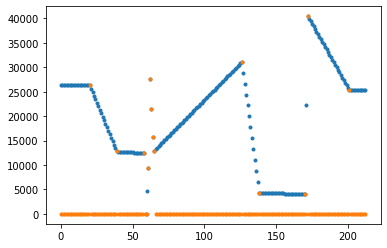

15/28b


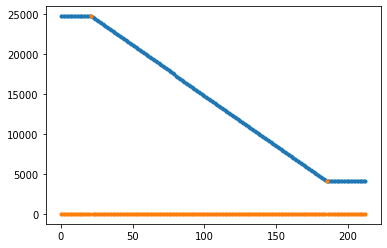

20/02


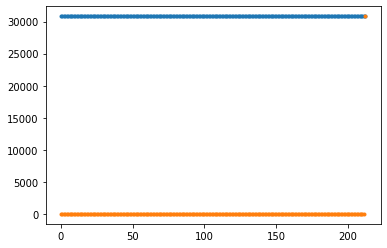

20/04


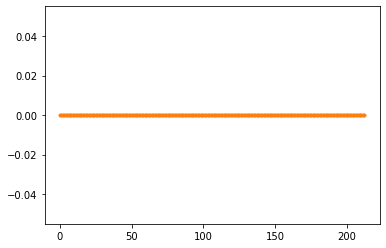

20/08


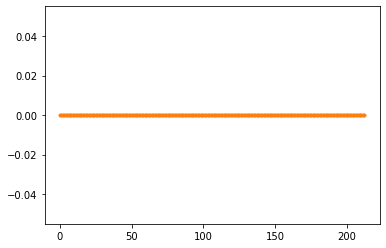

21/02


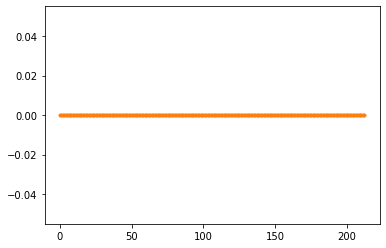

21/12


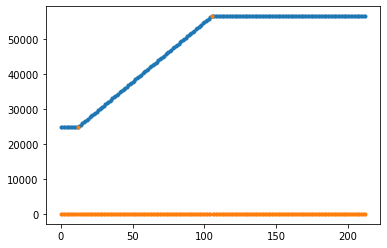

21/12a


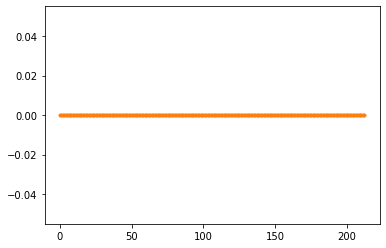

21/15a


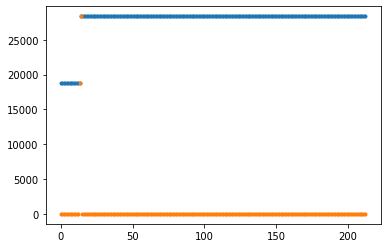

21/18


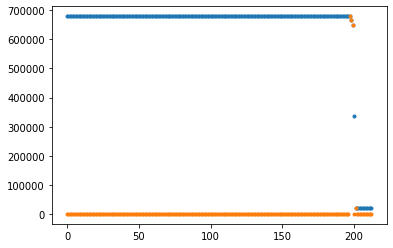

21/19


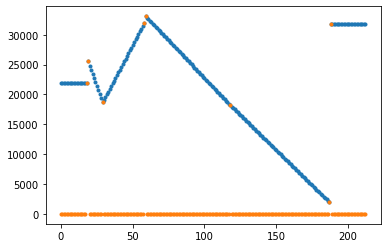

21/20a


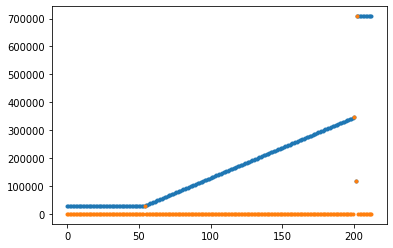

21/20b


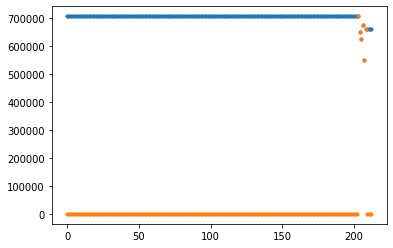

21/23b


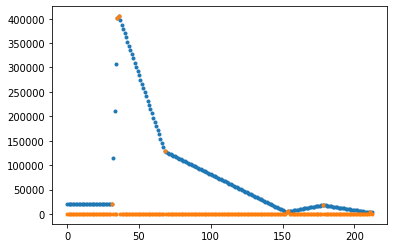

21/24


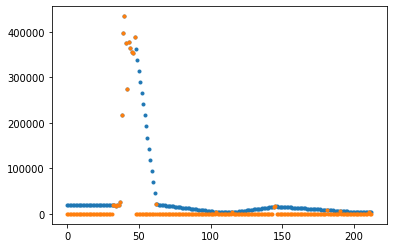

21/24a


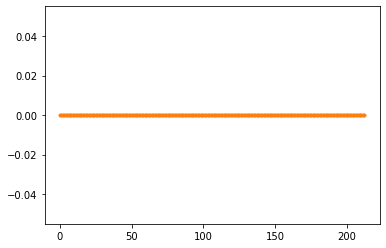

21/25


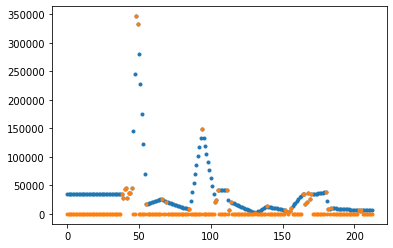

21/25a


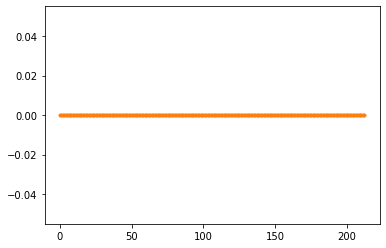

21/25b


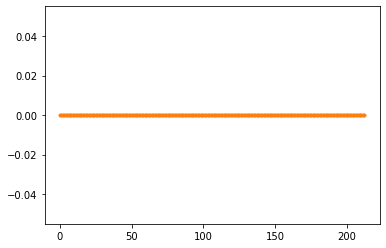

21/29a


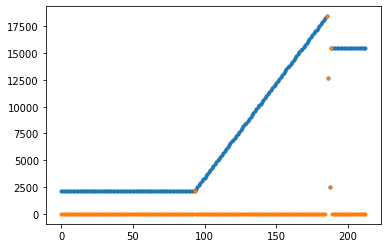

21/30


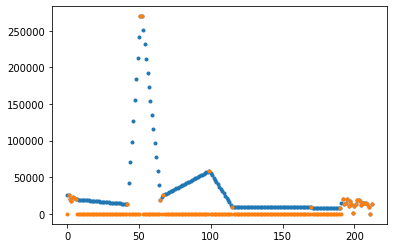

21/30b


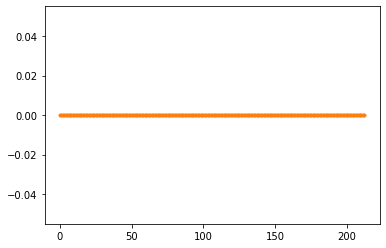

21/30d


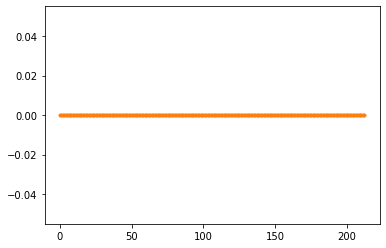

21/30f


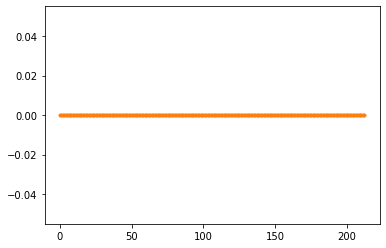

22/06a


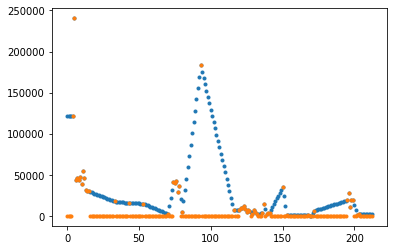

22/07


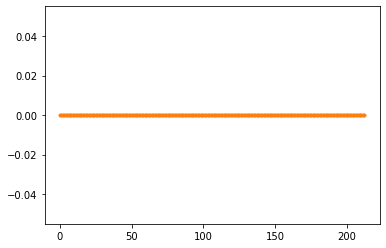

22/11


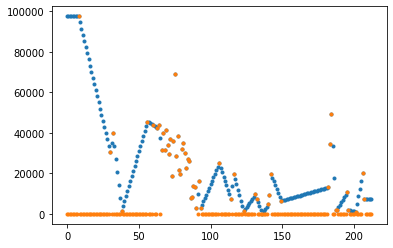

22/11a


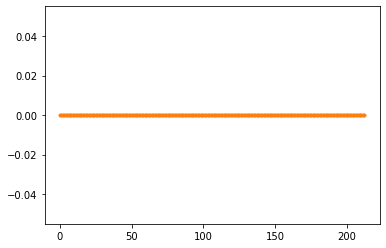

22/12a


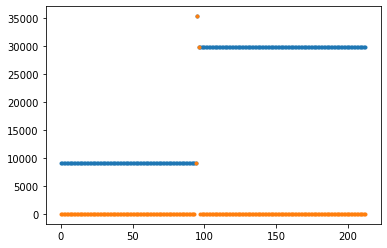

22/12c


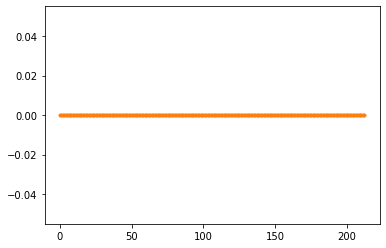

22/13a


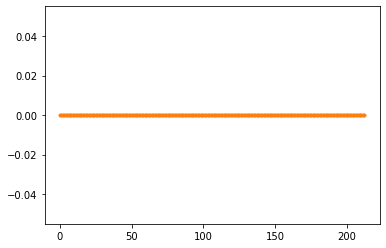

22/14b


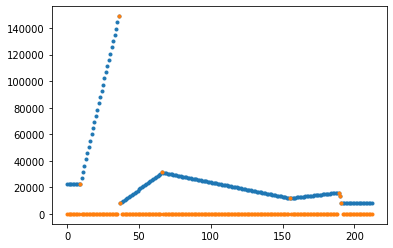

22/21


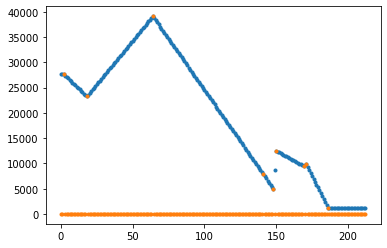

22/22b


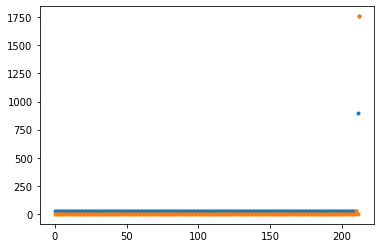

22/24


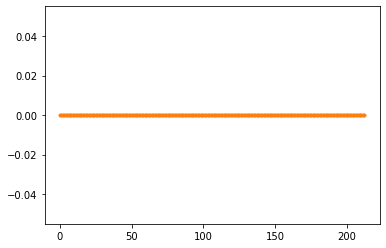

22/24a


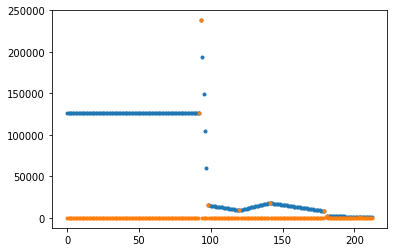

22/24b


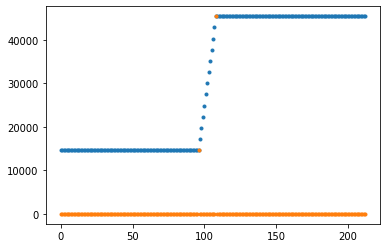

22/24d


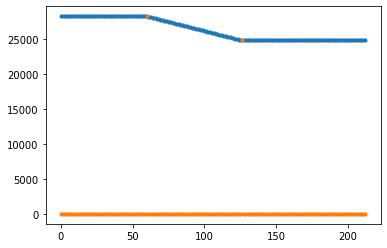

22/26a


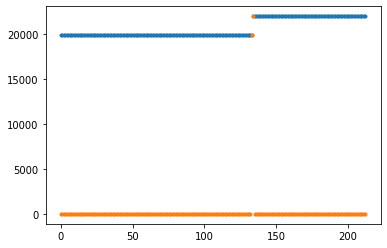

22/29


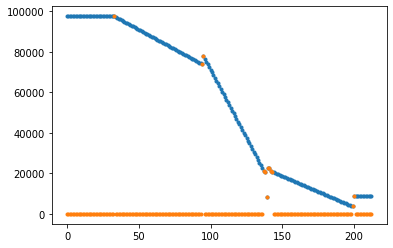

22/29c


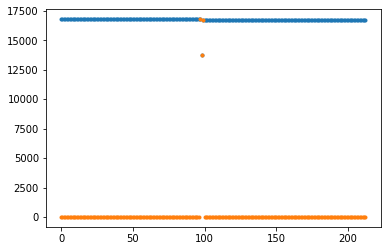

22/30a


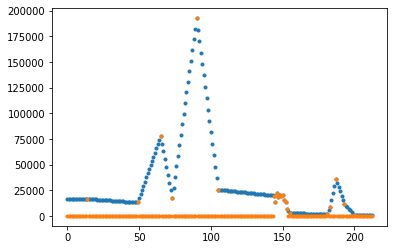

22/30b


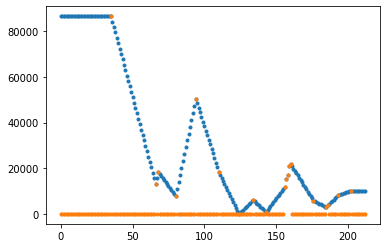

23/16b


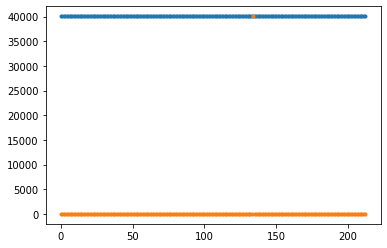

23/22a


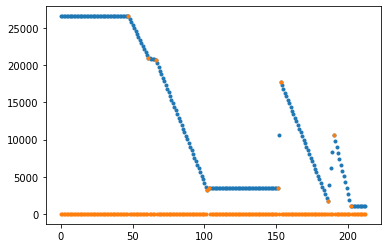

23/27


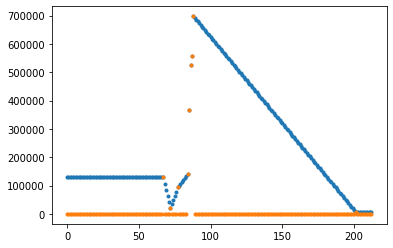

23/27a


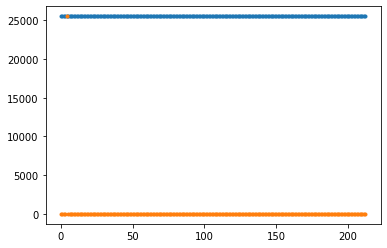

29/03a


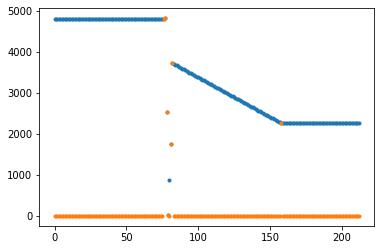

29/03c


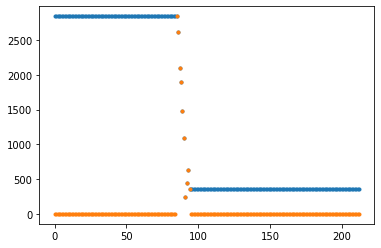

29/05


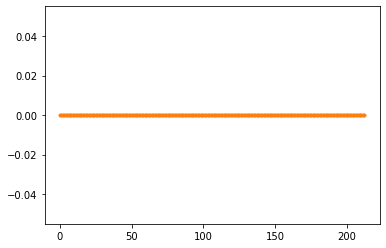

29/05b


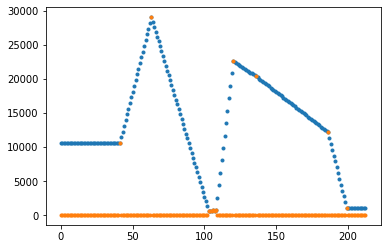

29/07


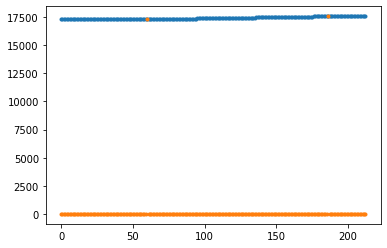

29/07a


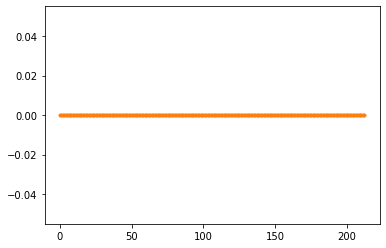

29/08a


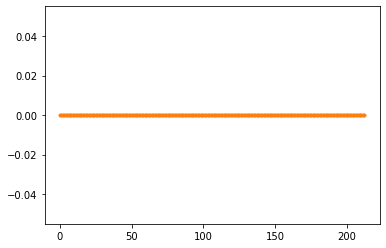

29/09a


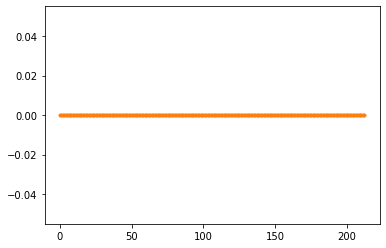

29/09b


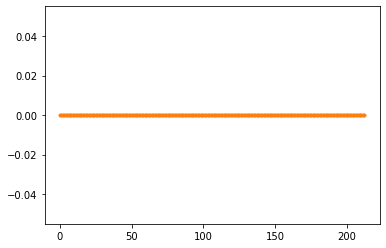

29/10


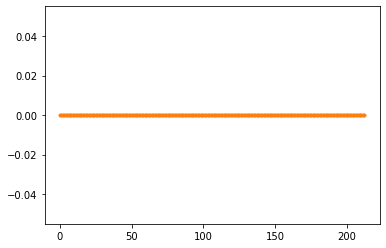

30/06


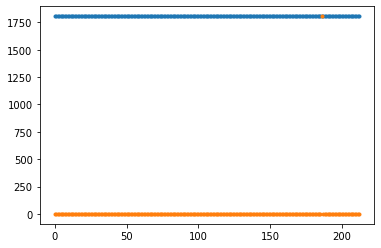

30/07a


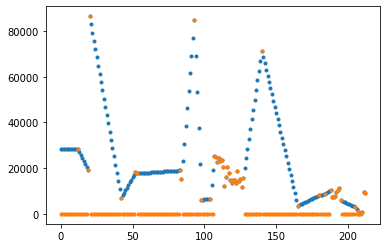

30/14


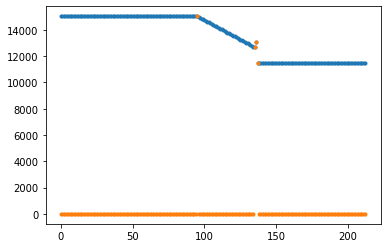

30/16


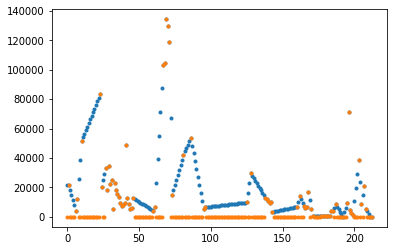

30/17a


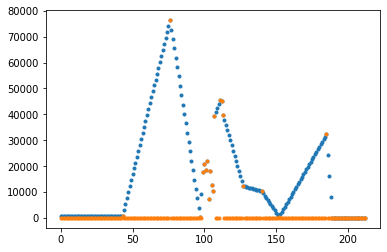

30/19a


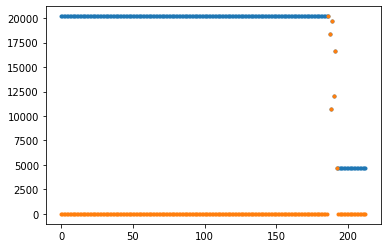

In [141]:
for k in blocks.keys(): 
    print(k)
    blocks[k]['oilprod'].plot(style='.')
    blocks[k]['OILPRODMAS'].plot(style='.')
    
    plt.show()

In [110]:
b = blocks['30/16']

In [113]:
b.loc[b['OILPRODMAS'] == 0, 'OILPRODMAS'] = None

In [117]:
b.loc[:, 'OILPRODMAS'] = b['OILPRODMAS'].interpolate(limit_direction='both')

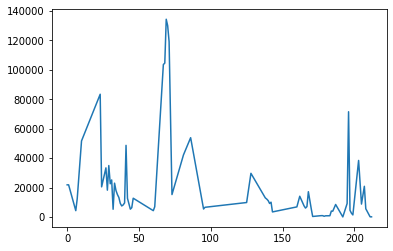

In [119]:
b['OILPRODMAS'].plot()

In [114]:
b.loc[:, 'OILPRODMAS'] = b['OILPRODMAS'].interpolate()

date  block  OILPRODMAS  OILPRODM3  OILPRDDENS  OILPRODMBD  \
0   2000-01-01  30/16         NaN        0.0         0.0    0.000000   
1   2000-02-01  30/16  21838.7880    31176.0         0.0    6.761967   
2   2000-03-01  30/16         NaN        0.0         0.0    0.000000   
3   2000-04-01  30/16         NaN        0.0         0.0    0.000000   
4   2000-05-01  30/16         NaN        0.0         0.0    0.000000   
5   2000-06-01  30/16         NaN        0.0         0.0    0.000000   
6   2000-07-01  30/16   4289.1058     5162.0       831.0    1.047386   
7   2000-08-01  30/16  12415.3592    14584.0       851.0    2.959141   
8   2000-09-01  30/16         NaN        0.0         0.0    0.000000   
9   2000-10-01  30/16         NaN        0.0         0.0    0.000000   
10  2000-11-01  30/16  51682.1760    62118.0       832.0   13.024074   
11  2000-12-01  30/16         NaN        0.0         0.0    0.000000   
12  2001-01-01  30/16         NaN        0.0         0.0    0.000000   
13  2001-02-01  30/16         NaN        0.0         0.0    0.000000   
14  2001-03-01  30/16         NaN        0.0         0.0    0.000000   
15  2001-04-01  30/16         NaN        0.0         0.0    0.000000   
16  2001-05-01  30/16         NaN        0.0         0.0    0.000000   
17  2001-06-01  30/16         NaN        0.0         0.0    0.000000   
18  2001-07-01  30/16         NaN        0.0         0.0    0.000000   
19  2001-08-01  30/16         NaN        0.0         0.0    0.000000   
20  2001-09-01  30/16         NaN        0.0         0.0    0.000000   
21  2001-10-01  30/16         NaN        0.0         0.0    0.000000   
22  2001-11-01  30/16         NaN        0.0         0.0    0.000000   
23  2001-12-01  30/16  83386.3680   100224.0       832.0   20.335773   
24  2002-01-01  30/16  20466.3200    26105.0       784.0    5.296789   
25  2002-02-01  30/16         NaN        0.0         0.0    0.000000   
26  2002-03-01  30/16         NaN        0.0         0.0    0.000000   
27  2002-04-01  30/16  33366.2760    40860.0       816.6    8.566980   
28  2002-05-01  30/16  18212.3797    22877.0       796.1    4.641817   
29  2002-06-01  30/16  34941.4100    42700.0       818.3    8.952767   
..         ...    ...         ...        ...         ...         ...   
183 2015-04-01  30/16    854.3590     1111.0       769.0    0.232940   
184 2015-05-01  30/16   4010.6196     4828.0       830.7    0.979617   
185 2015-06-01  30/16   3936.4470     4737.0       831.0    0.993191   
186 2015-07-01  30/16         NaN        0.0         0.0    0.000000   
187 2015-08-01  30/16   8479.1955    10173.0       833.5    2.064135   
188 2015-09-01  30/16         NaN        0.0         0.0    0.000000   
189 2015-10-01  30/16         NaN        0.0         0.0    0.000000   
190 2015-11-01  30/16         NaN        0.0         0.0    0.000000   
191 2015-12-01  30/16         NaN        0.0         0.0    0.000000   
192 2016-01-01  30/16     39.3372       49.0       802.8    0.009942   
193 2016-02-01  30/16         NaN        0.0         0.0    0.000000   
194 2016-03-01  30/16         NaN        0.0         0.0    0.000000   
195 2016-04-01  30/16   9141.7683    10437.0       875.9    2.188291   
196 2016-05-01  30/16  71494.4511    81867.0       873.3   16.611078   
197 2016-06-01  30/16   4539.1336     5224.0       868.9    1.095299   
198 2016-07-01  30/16   2567.7211     2947.0       871.3    0.597956   
199 2016-08-01  30/16   1395.3087     1593.0       875.9    0.323225   
200 2016-09-01  30/16         NaN        0.0         0.0    0.000000   
201 2016-10-01  30/16         NaN        0.0         0.0    0.000000   
202 2016-11-01  30/16         NaN        0.0         0.0    0.000000   
203 2016-12-01  30/16  38410.0080    46956.0       818.0    9.527524   
204 2017-01-01  30/16         NaN        0.0         0.0    0.000000   
205 2017-02-01  30/16   8759.1840    11004.0       398.0    2.471970   
206 2017-03-01  30/16         NaN        0.0      

In [31]:
list(data)

['date',
 'block',
 'GAS_C1',
 'GAS_C2',
 'C2_UNSAT',
 'GAS_C3',
 'C3_UNSAT',
 'GAS_IC4',
 'GAS_NC4',
 'C4_UNSAT',
 'GAS_NEOC5',
 'GAS_IC5',
 'GAS_NC5',
 'C5_UNSAT',
 'GAS_NC5_PLUS',
 'GAS_C6PLUS',
 'GAS_O2',
 'GAS_CO2',
 'WH_LONG',
 'WH_LAT',
 'OILPRODMAS',
 'OILPRODM3',
 'OILPRDDENS',
 'OILPRODMBD',
 'WATPRODMAS',
 'WATPRODVOL',
 'WATPRODMBD',
 'AGASPRODMA',
 'AGASPROMMS',
 'AGASPROKSM',
 'AGASPRODEN']